<a href="https://colab.research.google.com/github/SafakKutlu1977/github-pages/blob/main/Safak_kutlu_244329019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAKİNE ÖĞRENMESİ ARA SINAV ÖDEVİ 2024-2025 BAHAR DÖNEMİ

In [1]:
import pandas as pd
import numpy as np

# Veri setini oku
df = pd.read_excel("Dry_Bean_Dataset.xlsx")

# %5 oranında eksik veri (örnek: Area ve Perimeter)
for col in ['Area', 'Perimeter']:
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan

# %35 oranında eksik veri (örnek: Eccentricity)
df.loc[df.sample(frac=0.35, random_state=42).index, 'Eccentricity'] = np.nan

# Eksik değerlerin genel durumu
print("Eksik değer sayıları:")
print(df.isnull().sum())


Eksik değer sayıları:
Area                681
Perimeter           681
MajorAxisLength       0
MinorAxisLength       0
AspectRation          0
Eccentricity       4764
ConvexArea            0
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64


In [2]:
# %5 eksik olan sütunları (Area, Perimeter) ortalama ile doldur
df['Area'].fillna(df['Area'].mean(), inplace=True)
df['Perimeter'].fillna(df['Perimeter'].mean(), inplace=True)

# %35 eksik olan Eccentricity sütununu komple sil (veya istersen satır bazlı silebiliriz)
df.drop(columns=['Eccentricity'], inplace=True)


<ipython-input-2-3141c8240c4b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Area'].fillna(df['Area'].mean(), inplace=True)
<ipython-input-2-3141c8240c4b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [3]:
# Sayısal sütunları seç
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Aykırı değerleri tespit et ve gerekirse sil
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after = df.shape[0]
        print(f"{col}: {before - after} aykırı değer çıkarıldı.")
    return df

# Uygula
df = remove_outliers_iqr(df, numeric_cols)


Area: 556 aykırı değer çıkarıldı.
Perimeter: 2 aykırı değer çıkarıldı.
MajorAxisLength: 26 aykırı değer çıkarıldı.
MinorAxisLength: 172 aykırı değer çıkarıldı.
AspectRation: 385 aykırı değer çıkarıldı.
ConvexArea: 82 aykırı değer çıkarıldı.
EquivDiameter: 0 aykırı değer çıkarıldı.
Extent: 191 aykırı değer çıkarıldı.
Solidity: 734 aykırı değer çıkarıldı.
roundness: 70 aykırı değer çıkarıldı.
Compactness: 100 aykırı değer çıkarıldı.
ShapeFactor1: 53 aykırı değer çıkarıldı.
ShapeFactor2: 0 aykırı değer çıkarıldı.
ShapeFactor3: 127 aykırı değer çıkarıldı.
ShapeFactor4: 460 aykırı değer çıkarıldı.


In [4]:
from sklearn.preprocessing import StandardScaler

# Sadece sayısal sütunları al (hedef sütunu hariç)
X = df.drop('Class', axis=1)  # 'Class' hedef sütun
y = df['Class']

# Ölçekleme işlemi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ölçeklenmiş veri bir DataFrame'e çevrilirse görsel analiz daha kolay olur
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Kontrol amaçlı: Ortalama 0’a yakın mı, std 1 mi?
print("\nÖlçeklenmiş veri istatistikleri (ilk 3 sütun):")
print(X_scaled_df.iloc[:, :3].describe())



Ölçeklenmiş veri istatistikleri (ilk 3 sütun):
               Area     Perimeter  MajorAxisLength
count  1.065300e+04  1.065300e+04     1.065300e+04
mean  -9.177760e-16  2.134363e-17    -1.920927e-16
std    1.000047e+00  1.000047e+00     1.000047e+00
min   -1.767534e+00 -1.978957e+00    -1.898465e+00
25%   -7.239627e-01 -7.569469e-01    -7.950620e-01
50%   -2.300293e-01 -2.059991e-01    -2.756715e-01
75%    5.110171e-01  4.699247e-01     7.159259e-01
max    3.031664e+00  2.837969e+00     2.858447e+00


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Sınıf etiketlerinin sayısal karşılıkları
print("\nSınıf etiketleri:")
for i, cls in enumerate(label_encoder.classes_):
    print(f"{cls} --> {i}")



Sınıf etiketleri:
BARBUNYA --> 0
CALI --> 1
DERMASON --> 2
HOROZ --> 3
SEKER --> 4
SIRA --> 5


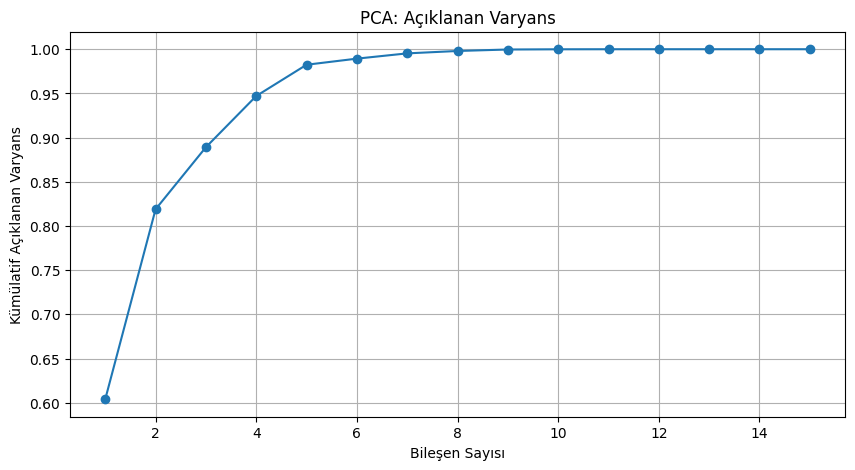

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA uygula (tüm bileşenleri koru)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Açıklanan varyans oranlarını görselleştir
explained_var = pca.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o')
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Açıklanan Varyans")
plt.title("PCA: Açıklanan Varyans")
plt.grid(True)
plt.show()


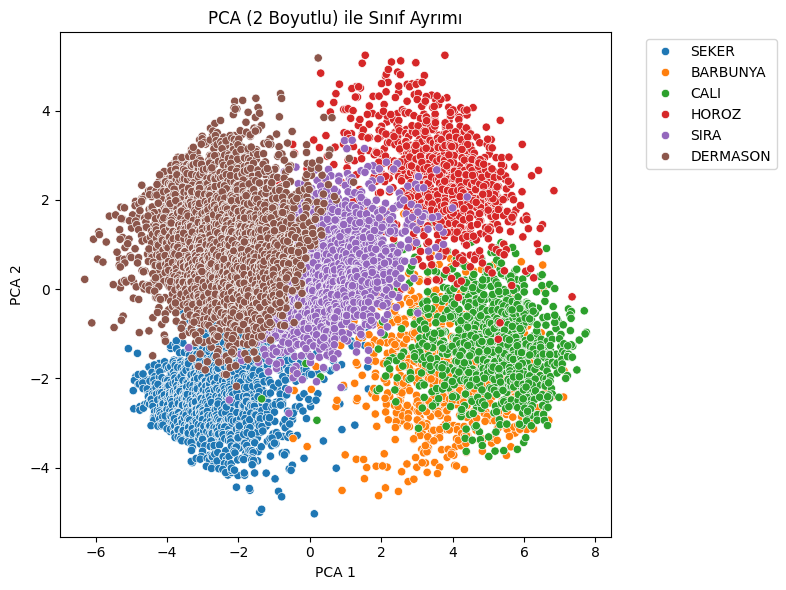

In [7]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="tab10")
plt.title("PCA (2 Boyutlu) ile Sınıf Ayrımı")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


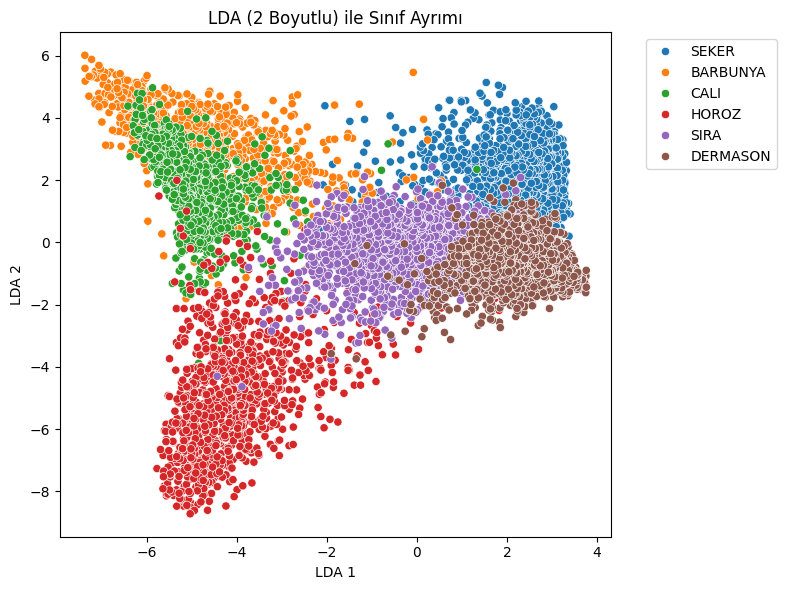

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y_encoded)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette="tab10")
plt.title("LDA (2 Boyutlu) ile Sınıf Ayrımı")
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# === METRİKLERİ TUTMAK İÇİN ===
from collections import defaultdict
from tqdm import tqdm

def cross_validate_nested(X, y, model, param_grid, outer_k=5, inner_k=3):
    outer_cv = StratifiedKFold(n_splits=outer_k, shuffle=True, random_state=42)
    inner_cv = StratifiedKFold(n_splits=inner_k, shuffle=True, random_state=42)

    acc_list, prec_list, rec_list, f1_list = [], [], [], []

    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # GridSearchCV ile hiperparametre ayarı
        grid = GridSearchCV(model, param_grid, cv=inner_cv, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_

        # Dış test setinde performans
        y_pred = best_model.predict(X_test)
        acc_list.append(accuracy_score(y_test, y_pred))
        prec_list.append(precision_score(y_test, y_pred, average='macro'))
        rec_list.append(recall_score(y_test, y_pred, average='macro'))
        f1_list.append(f1_score(y_test, y_pred, average='macro'))

    return {
        'accuracy': (np.mean(acc_list), np.std(acc_list)),
        'precision': (np.mean(prec_list), np.std(prec_list)),
        'recall': (np.mean(rec_list), np.std(rec_list)),
        'f1': (np.mean(f1_list), np.std(f1_list))
    }


In [10]:
data_variants = {
    'Ham Veri': X_scaled,
    'PCA': X_pca,
    'LDA': X_lda
}

models_and_params = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10]
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [3, 5, 10, None]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100],
        'max_depth': [5, 10, None]
    }),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    'Naive Bayes': (GaussianNB(), {
        # GaussianNB için hiperparametre yok, varsayılan
        }
    )
}

# Sonuçları sakla
all_results = defaultdict(dict)

for rep_name, X_input in data_variants.items():
    print(f"\n📦 Veri Temsili: {rep_name}")
    for model_name, (model, params) in tqdm(models_and_params.items()):
        print(f"🔍 Model: {model_name}")
        result = cross_validate_nested(np.array(X_input), y_encoded, model, params)
        all_results[rep_name][model_name] = result



📦 Veri Temsili: Ham Veri


  0%|          | 0/5 [00:00<?, ?it/s]

🔍 Model: Logistic Regression


 20%|██        | 1/5 [00:09<00:38,  9.53s/it]

🔍 Model: Decision Tree


 40%|████      | 2/5 [00:16<00:23,  7.87s/it]

🔍 Model: Random Forest


 60%|██████    | 3/5 [02:02<01:45, 52.89s/it]

🔍 Model: XGBoost


 80%|████████  | 4/5 [03:37<01:09, 69.45s/it]

🔍 Model: Naive Bayes


100%|██████████| 5/5 [03:37<00:00, 43.57s/it]



📦 Veri Temsili: PCA


  0%|          | 0/5 [00:00<?, ?it/s]

🔍 Model: Logistic Regression


 20%|██        | 1/5 [00:07<00:29,  7.31s/it]

🔍 Model: Decision Tree


 40%|████      | 2/5 [00:13<00:19,  6.66s/it]

🔍 Model: Random Forest


 60%|██████    | 3/5 [02:02<01:46, 53.38s/it]

🔍 Model: XGBoost


 80%|████████  | 4/5 [03:55<01:16, 76.74s/it]

🔍 Model: Naive Bayes


100%|██████████| 5/5 [03:55<00:00, 47.08s/it]



📦 Veri Temsili: LDA


  0%|          | 0/5 [00:00<?, ?it/s]

🔍 Model: Logistic Regression


 20%|██        | 1/5 [00:04<00:17,  4.28s/it]

🔍 Model: Decision Tree


 40%|████      | 2/5 [00:05<00:06,  2.32s/it]

🔍 Model: Random Forest


 60%|██████    | 3/5 [00:50<00:43, 21.83s/it]

🔍 Model: XGBoost


 80%|████████  | 4/5 [01:22<00:25, 25.81s/it]

🔍 Model: Naive Bayes


100%|██████████| 5/5 [01:22<00:00, 16.49s/it]


In [11]:
for rep_name in all_results:
    print(f"\n====== {rep_name} Sonuçları ======")
    for model_name, metrics in all_results[rep_name].items():
        print(f"\n📌 {model_name}")
        for metric, (mean, std) in metrics.items():
            print(f"{metric.capitalize()}: {mean:.3f} ± {std:.3f}")



====== Ham Veri Sonuçları ======

📌 Logistic Regression
Accuracy: 0.915 ± 0.007
Precision: 0.922 ± 0.007
Recall: 0.917 ± 0.007
F1: 0.919 ± 0.007

📌 Decision Tree
Accuracy: 0.894 ± 0.006
Precision: 0.899 ± 0.005
Recall: 0.895 ± 0.006
F1: 0.897 ± 0.006

📌 Random Forest
Accuracy: 0.911 ± 0.008
Precision: 0.919 ± 0.008
Recall: 0.910 ± 0.008
F1: 0.914 ± 0.008

📌 XGBoost
Accuracy: 0.916 ± 0.006
Precision: 0.925 ± 0.006
Recall: 0.918 ± 0.007
F1: 0.921 ± 0.007

📌 Naive Bayes
Accuracy: 0.888 ± 0.006
Precision: 0.885 ± 0.006
Recall: 0.885 ± 0.005
F1: 0.884 ± 0.005

====== PCA Sonuçları ======

📌 Logistic Regression
Accuracy: 0.915 ± 0.007
Precision: 0.922 ± 0.007
Recall: 0.917 ± 0.007
F1: 0.920 ± 0.007

📌 Decision Tree
Accuracy: 0.889 ± 0.006
Precision: 0.891 ± 0.010
Recall: 0.887 ± 0.005
F1: 0.888 ± 0.006

📌 Random Forest
Accuracy: 0.915 ± 0.007
Precision: 0.924 ± 0.005
Recall: 0.916 ± 0.006
F1: 0.920 ± 0.005

📌 XGBoost
Accuracy: 0.914 ± 0.004
Precision: 0.922 ± 0.003
Recall: 0.915 ± 0.005
F1:

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle


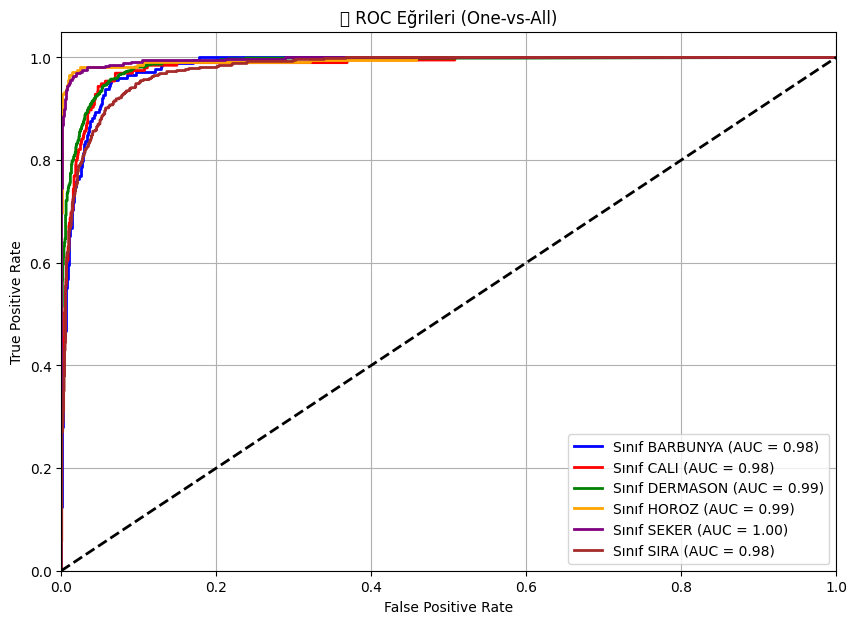

In [16]:
# 1. ROC için veriyi hazırla
from sklearn.model_selection import train_test_split # This line imports the missing function
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 2. Modeli eğit
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

# ... (rest of the code remains unchanged)

# 3. Sınıf sayısını ve renkleri ayarla
classes = np.unique(y_encoded)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)

# 4. ROC eğrileri
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Çizim
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'gray'])

plt.figure(figsize=(10, 7))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Sınıf {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📈 ROC Eğrileri (One-vs-All)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


BİTCOİN DEĞER TAHMİNİ

In [ ]:

!pip install prophet
!pip install fbprophet
!pip instal yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [ ]:
from prophet import Prophet
import yfinance as yf

In [ ]:
df=yf.download('BTC-USD',"2015-01-01","2025-04-22")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df=df[['Close']]

In [ ]:
df=df.reset_index()

In [ ]:
df.head(3)

Price        Date       Close
Ticker                BTC-USD
0      2015-01-01  314.248993
1      2015-01-02  315.032013
2      2015-01-03  281.082001

In [ ]:
df.columns=['ds','y']

In [ ]:
df.head(3)

ds           y
0 2015-01-01  314.248993
1 2015-01-02  315.032013
2 2015-01-03  281.082001

In [ ]:
model=Prophet()

In [ ]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rlhnj33/z4e5tpc1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9rlhnj33/3j7jwhw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78773', 'data', 'file=/tmp/tmp9rlhnj33/z4e5tpc1.json', 'init=/tmp/tmp9rlhnj33/3j7jwhw_.json', 'output', 'file=/tmp/tmp9rlhnj33/prophet_model9auc5gz6/prophet_model-20250422205620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:56:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
gelecek=model.make_future_dataframe(periods=365)

In [ ]:
tahmin=model.predict(gelecek)

In [ ]:
tahmin

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0    2015-01-01    -776.563956   -5919.338604    7235.574875    -776.563956   
1    2015-01-02    -773.317737   -5694.937420    6943.694806    -773.317737   
2    2015-01-03    -770.071517   -5649.982960    7212.156920    -770.071517   
3    2015-01-04    -766.825297   -6176.146160    7261.299188    -766.825297   
4    2015-01-05    -763.579078   -5747.787366    7671.774963    -763.579078   
...         ...            ...            ...            ...            ...   
4124 2026-04-17  130610.106239  114991.480056  147641.294731  114165.527778   
4125 2026-04-18  130710.034401  115791.165552  147649.678501  114144.589172   
4126 2026-04-19  130809.962562  114851.040221  148178.730619  114163.943496   
4127 2026-04-20  130909.890724  114136.550154  147919.671498  114185.241002   
4128 2026-04-21  131009.818886  115465.136149  148471.755941  114193.918872   

        trend_upper  additive_terms  additive_terms_lower  \
0       -776.563956     1364.287808           1364.287808   
1       -773.317737     1426.013866           1426.013866   
2       -770.071517     1449.963435           1449.963435   
3       -766.825297     1447.550510           1447.550510   
4       -763.579078     1506.555474           1506.555474   
...             ...             ...                   ...   
4124  144550.973779     2145.370118           2145.370118   
4125  144748.865330     2147.585249           2147.585249   
4126  145011.258838     2134.575565           2134.575565   
4127  145193.701916     2194.103240           2194.103240   
4128  145372.445894     2176.982172           2176.982172   

      additive_terms_upper     weekly  weekly_lower  weekly_upper  \
0              1364.287808 -27.034254    -27.034254    -27.034254   
1              1426.013866   2.828868      2.828868      2.828868   
2              1449.963435  -0.996696     -0.996696     -0.996696   
3              1447.550510 -26.061935    -26.061935    -26.061935   
4              1506.555474  16.344906     16.344906     16.344906   
...                    ...        ...           ...           ...   
4124           2145.370118   2.828868      2.828868      2.828868   
4125           2147.585249  -0.996696     -0.996696     -0.996696   
4126           2134.575565 -26.061935    -26.061935    -26.061935   
4127           2194.103240  16.344906     16.344906     16.344906   
4128           2176.982172 -21.820741    -21.820741    -21.820741   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0     1391.322063   1391.322063   1391.322063                   0.0   
1     1423.184998   1423.184998   1423.184998                   0.0   
2     1450.960131   1450.960131   1450.960131                   0.0   
3     1473.612445   1473.612445   1473.612445                   0.0   
4     1490.210568   1490.210568   1490.210568                   0.0   
...           ...           ...           ...                   ...   
4124  2142.541250   2142.541250   2142.541250                   0.0   
4125  2148.581945   2148.581945   2148.581945                   0.0   
4126  2160.637500   2160.637500   2160.637500                   0.0   
4127  2177.758334   2177.758334   2177.758334                   0.0   
4128  2198.802913   2198.802913   2198.802913                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                            0.0                         0.0     587.723852  
1                            0.0                         0.0     652.696129  
2                            0.0                         0.0     679.891918  
3                            0.0                         0.0     680.725212  
4                            0.0                         0.0     742.976396  
...                          ...                         ...            ...  
4124                         0.0                         0.0  132755.476357  
4125                     

<Axes: xlabel='ds'>

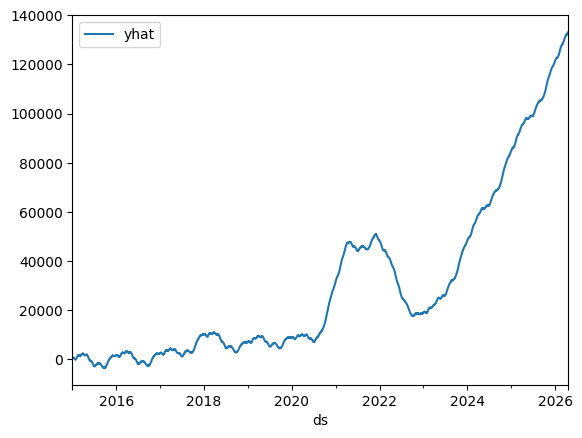

In [ ]:
tahmin.plot(x='ds',y='yhat')

PİVOT TABLE YAPAN KOD



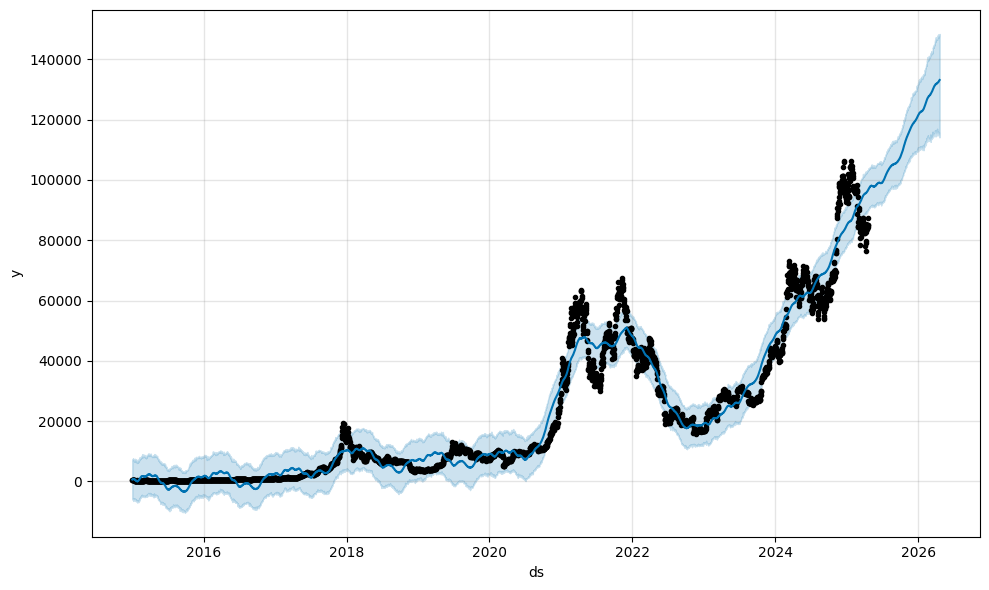

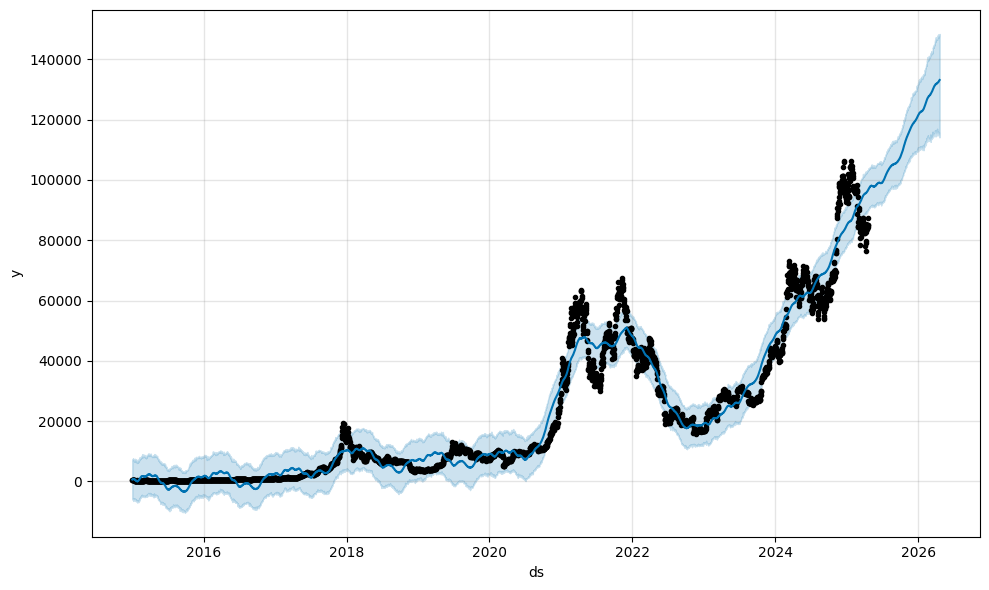

In [ ]:
model.plot(tahmin)

PiVOT TABLE YAPMA

In [ ]:
import pandas as pd

# Dosyayı oku
df = pd.read_excel("/content/Berket_POsMerkezSubeUrunmiktarlarıSatış.xlsx")

# Gerekli sütunları uzun forma çevir
df_long = df.melt(id_vars=["Urun Adi", "Sube"],
                  value_vars=["Miktar", "Onceki Ay Miktar"],
                  var_name="Tip", value_name="Deger")

# Pivot: Ürünler satırda, şubeler + tip sütunda
pivot = df_long.pivot_table(index="Urun Adi", columns=["Sube", "Tip"], values="Deger", aggfunc="sum")

# Daha okunabilir hale getirmek için sütun isimlerini birleştir
pivot.columns = [f"{sube} ({tip})" for sube, tip in pivot.columns]

# Sonucu Excel'e kaydet
pivot.to_excel("urunler_satirda_subeler_sutunda.xlsx")

print("✅ Ürün bazlı pivot tablo oluşturuldu ve başarıyla kaydedildi.")




✅ Ürün bazlı pivot tablo oluşturuldu ve başarıyla kaydedildi.



TWITTER DUYGU ANALİZİ



In [ ]:
# Gerekli kütüphaneleri yükleyin
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# NLTK verilerini indir
# NLTK verilerini indir
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' data package

# 1. Veri setini yükle
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']
data = pd.read_csv('training.csv', encoding='latin-1', names=column_names)

# 2. Temizleme fonksiyonu
def clean_tweet(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text.strip()

# 3. Ön işleme fonksiyonu
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# 4. Temizleme ve ön işleme
data['text'] = data['text'].fillna('')
data['cleaned_text'] = data['text'].apply(clean_tweet)
data['preprocessed_text'] = data['cleaned_text'].apply(preprocess_text)

# 5. Tokenizer ve padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['preprocessed_text'])
sequences = tokenizer.texts_to_sequences(data['preprocessed_text'])
X = pad_sequences(sequences, maxlen=100)

# 6. Etiketleri hazırla (0 = Negative, 4 = Positive)
# Original: y = data['target'].values
y = data['target'].values
y[y == 4] = 2  # Replace 4 with 2 for positive sentiment

# y = data['target'].apply(lambda x: 0 if x == 0 else (1 if x == 2 else 2)).values  # Convert to 0, 1, and 2
# 7. Kelime sayısını al
vocab_size = min(len(tokenizer.word_index) + 1, 10000)

# 8. Eğitim/test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 9. Model tanımı
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=100))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # 3 sınıf: 0, 2, belki 4

# 10. Model derleme
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 11. Model eğitimi
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# 12. Test değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# 13. Yeni metinler için tahmin
new_texts = ["This product is great!", "I hated this movie.", "It's okay, not the best."]

# Yeni metinleri ön işleyelim
new_texts_cleaned = [clean_tweet(t) for t in new_texts]
new_texts_preprocessed = [preprocess_text(t) for t in new_texts_cleaned]
new_sequences = tokenizer.texts_to_sequences(new_texts_preprocessed)
new_input = pad_sequences(new_sequences, maxlen=100)

# Tahmin yap
predictions = model.predict(new_input)

# Sınıf isimleri
labels = ['Negative', 'Neutral', 'Positive']

# Tahminleri yazdır
for text, pred in zip(new_texts, predictions):
    sentiment = labels[np.argmax(pred)]
    print(f"Text: {text} - Sentiment: {sentiment}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
9000/9000 ━━━━━━━━━━━━━━━━━━━━ 4960s 551ms/step - accuracy: 0.7555 - loss: 0.4939 - val_accuracy: 0.7897 - val_loss: 0.4440
Epoch 2/5
2674/9000 ━━━━━━━━━━━━━━━━━━━━ 56:47 539ms/step - accuracy: 0.7946 - loss: 0.4373

KeyboardInterrupt: 

In [ ]:
# Gerekli kütüphaneleri yükleyin
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# NLTK veri setlerini indir
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Veri Yükleme
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']
# Adding the 'on_bad_lines' parameter to handle problematic rows.
# Adding the 'quoting=3' parameter to ignore quotes within fields.
# Replacing 'error_bad_lines' with 'on_bad_lines' for newer Pandas versions
try:
    data = pd.read_csv('training.csv', encoding='latin-1', names=column_names, on_bad_lines='skip', quoting=3)
except TypeError:
    # For older pandas versions, use try-except to handle the error
    data = pd.read_csv('training.csv', encoding='latin-1', names=column_names, quoting=3)
data['text'] = data['text'].fillna('')
# 2. Temizleme Fonksiyonu
def clean_tweet(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

data['cleaned_text'] = data['text'].apply(clean_tweet)

# 3. Ön İşleme
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

data['preprocessed_text'] = data['cleaned_text'].apply(preprocess_text)

# 4. Tokenizer ve Padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['preprocessed_text'])
sequences = tokenizer.texts_to_sequences(data['preprocessed_text'])
X = pad_sequences(sequences, maxlen=100)

# 5. Hedef Değişken
y = data['target'].values

# 6. Eğitim/Test Ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 7. Model Kurulumu
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 8. Model Eğitimi
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# 9. Değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# 10. Yeni Metinler Üzerinde Tahmin
new_texts = ["This product is great!", "I hated this movie.", "It's okay, not the best."]
cleaned = [clean_tweet(t) for t in new_texts]
preprocessed = [preprocess_text(t) for t in cleaned]
sequences = tokenizer.texts_to_sequences(preprocessed)
padded = pad_sequences(sequences, maxlen=100)

predictions = model.predict(padded)
for text, pred in zip(new_texts, predictions):
    sentiment = 'Positive' if pred > 0.5 else 'Negative'
    print(f"Text: '{text}' → Sentiment: {sentiment} ({pred[0]:.2f})")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


VERİ MADENCİLİĞİ-SATIŞ TAHMİNİ

Saving SatisRevize6.xlsx to SatisRevize6.xlsx


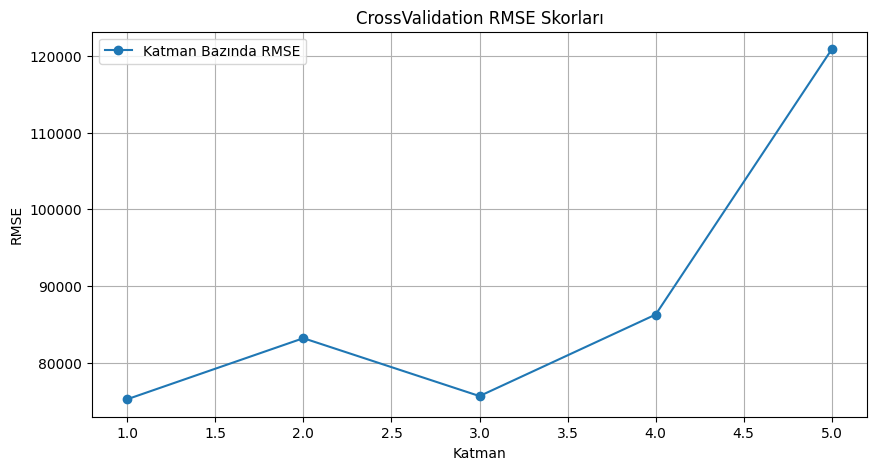

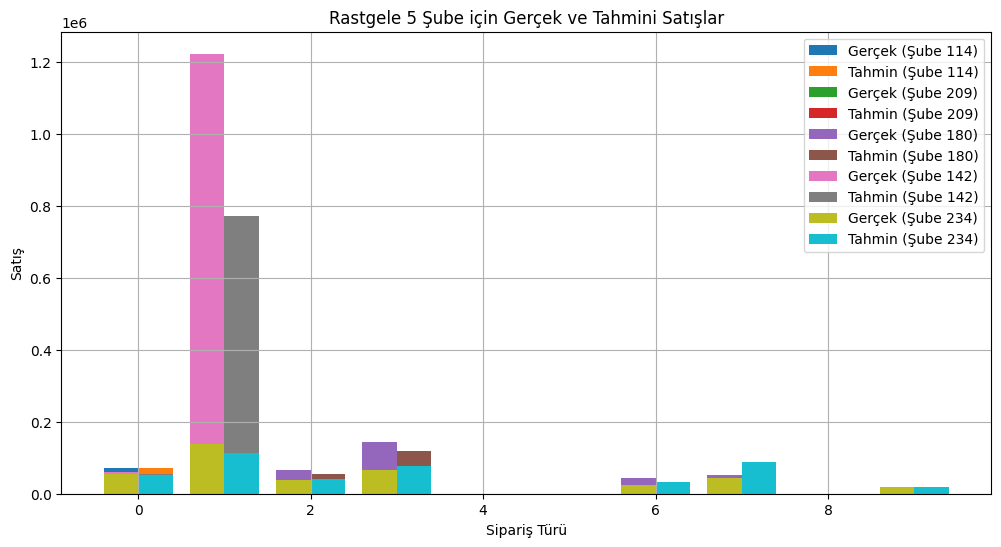

Tahminler '/content/TahminSonuclari.xlsx' dosyasına kaydedildi.
Gelecek bir ayın tahminleri '/content/GelecekAyTahminleri.xlsx' dosyasına kaydedildi.
Katmanlar arası ortalama RMSE: 88238.12


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
# Veriyi yükle ve temizle
file_path = '/content/SatisRevize6.xlsx'
data = pd.read_excel(file_path)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data['Tarih'] = pd.to_datetime(data['Tarih'], errors='coerce', dayfirst=True)
data = data.dropna(subset=['Tarih'])
data = data.astype({'SiparisTuru': 'int', 'SubeId': 'int', 'Satis': 'float'})

# Modelleme için veriyi hazırla
grouped = data.groupby(['SubeId', 'SiparisTuru'])['Satis'].sum().reset_index()
X = grouped[['SubeId', 'SiparisTuru']]
y = grouped['Satis']

# Model tanımı
model = RandomForestRegressor(random_state=42)

# Çapraz doğrulama
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Tüm veri seti üzerinde modeli eğit
model.fit(X, y)

# Tahminler
tahminler = model.predict(X)
grouped['Tahmin'] = tahminler

# Gelecek bir ayın tahminlerini oluştur
gelecek_ay = pd.DataFrame({
    'SubeId': grouped['SubeId'],
    'SiparisTuru': grouped['SiparisTuru'],
    'TahminEdilenSatis': tahminler
})

# CrossValidation RMSE skorlarını görselleştir
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(rmse_scores) + 1), rmse_scores, marker='o', label='Katman Bazında RMSE')
plt.title('CrossValidation RMSE Skorları')
plt.xlabel('Katman')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

# Rastgele 5 şube seç ve tahminleri görselleştir
plt.figure(figsize=(12, 6))
rastgele_subeler = np.random.choice(grouped['SubeId'].unique(), size=5, replace=False)
for sube in rastgele_subeler:
    sube_verisi = grouped[grouped['SubeId'] == sube]
    plt.bar(sube_verisi['SiparisTuru'] - 0.2, sube_verisi['Satis'], width=0.4, label=f'Gerçek (Şube {sube})')
    plt.bar(sube_verisi['SiparisTuru'] + 0.2, sube_verisi['Tahmin'], width=0.4, label=f'Tahmin (Şube {sube})')

plt.title('Rastgele 5 Şube için Gerçek ve Tahmini Satışlar')
plt.xlabel('Sipariş Türü')
plt.ylabel('Satış')
plt.legend()
plt.grid()
plt.show()

# Tahminleri bir Excel dosyasına kaydet
output_file = '/content/TahminSonuclari.xlsx'
grouped.to_excel(output_file, index=False)
print(f"Tahminler '{output_file}' dosyasına kaydedildi.")

# Gelecek bir ayın tahminlerini ayrı bir Excel dosyasına kaydet
future_output_file = '/content/GelecekAyTahminleri.xlsx'
gelecek_ay.to_excel(future_output_file, index=False)
print(f"Gelecek bir ayın tahminleri '{future_output_file}' dosyasına kaydedildi.")

# Model değerlendirme
print(f"Katmanlar arası ortalama RMSE: {rmse_scores.mean():.2f}")

SAYISAL GÖRÜNTÜ İŞLEME FİNAL  ÖDEVİ

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
234 resim bulundu.


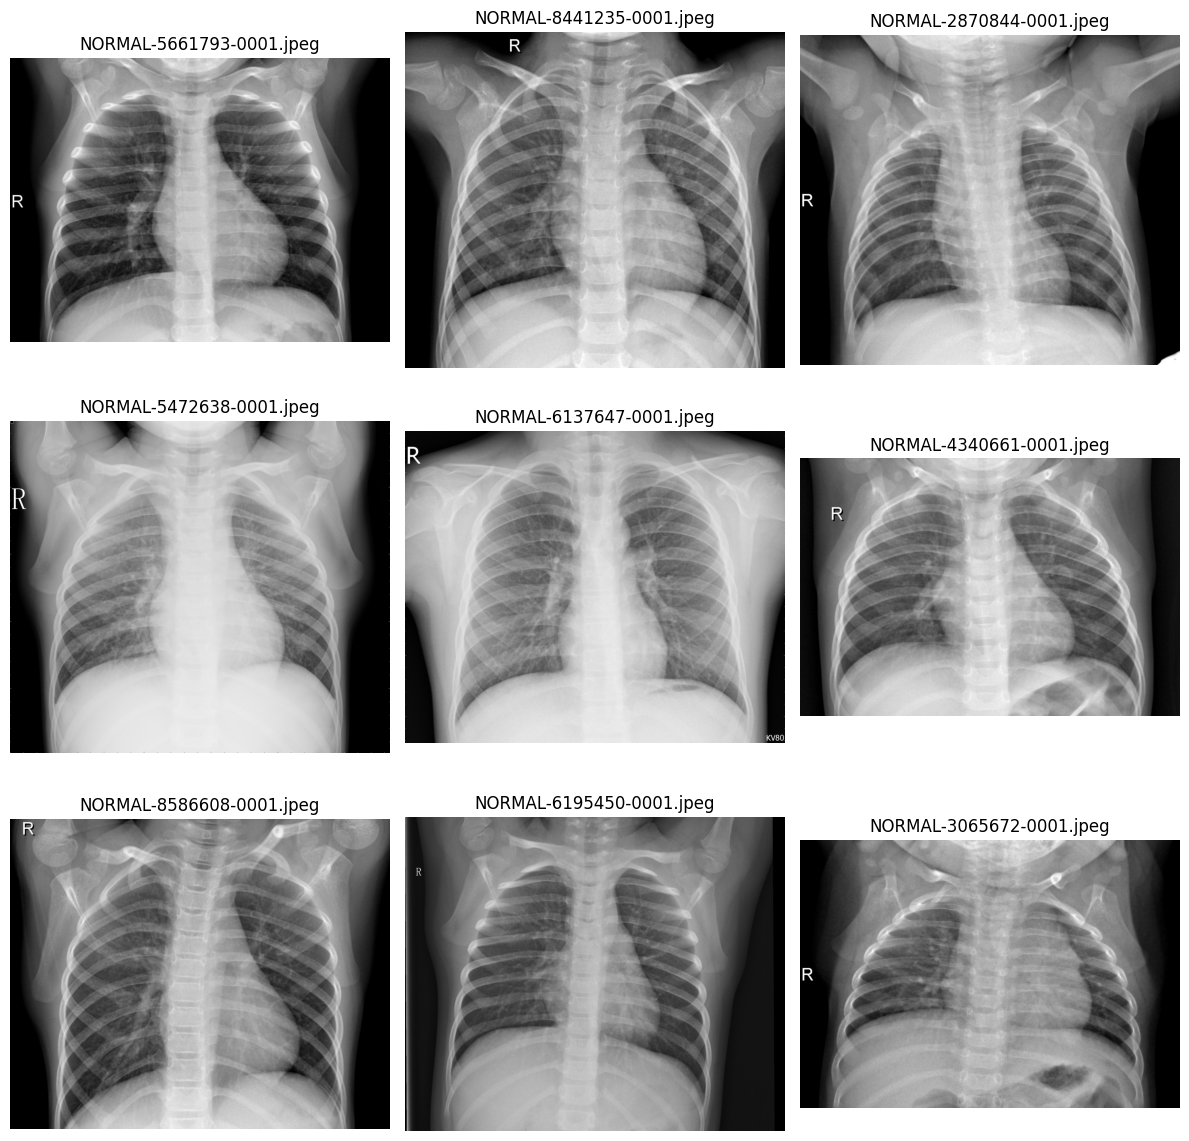

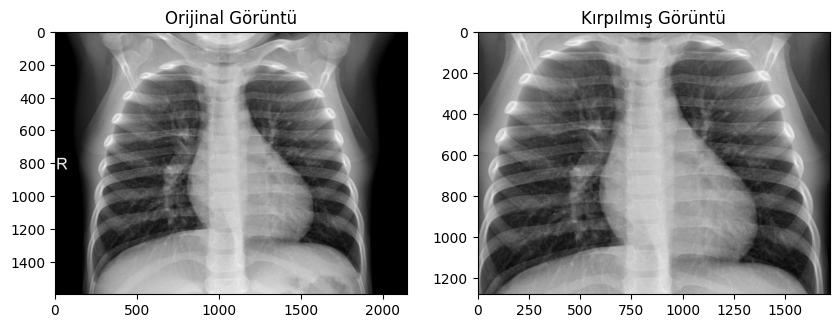

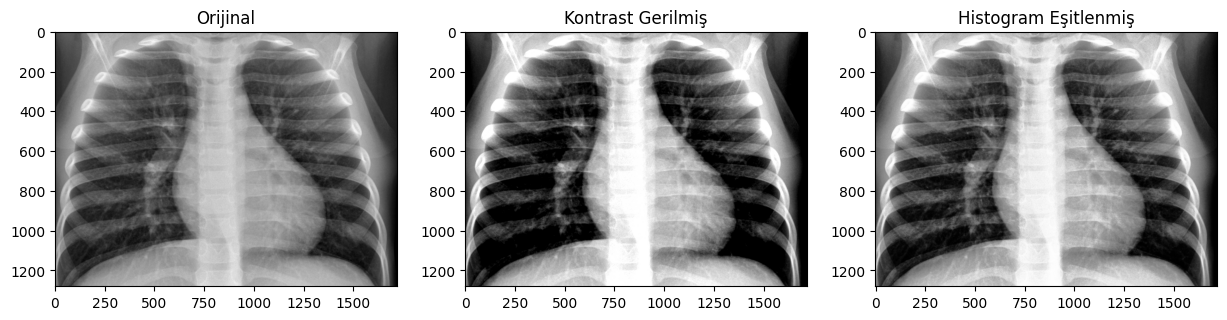

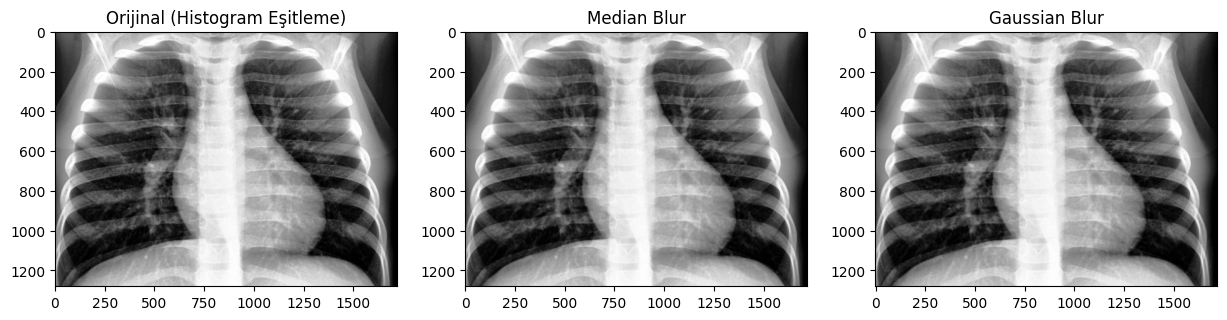

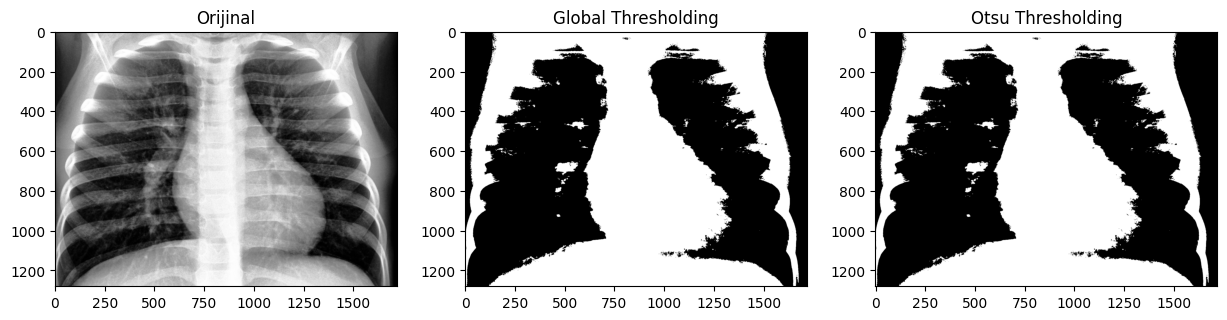

Bölge Sayısı: 546
Region 1: Area=1094005.0, Centroid=(648.3236191790714, 876.263814150758), Eccentricity=0.34650834681134735
Region 2: Area=2.0, Centroid=(7.0, 1519.5), Eccentricity=1.0
Region 3: Area=2.0, Centroid=(10.5, 1518.0), Eccentricity=1.0
Region 4: Area=2.0, Centroid=(13.0, 1517.5), Eccentricity=1.0
Region 5: Area=2.0, Centroid=(17.5, 137.0), Eccentricity=1.0
Region 6: Area=12.0, Centroid=(23.333333333333332, 141.41666666666666), Eccentricity=0.9184656209846781
Region 7: Area=1.0, Centroid=(23.0, 1518.0), Eccentricity=0
Region 8: Area=6.0, Centroid=(38.333333333333336, 150.83333333333334), Eccentricity=0.487950036474267
Region 9: Area=4.0, Centroid=(36.0, 811.5), Eccentricity=1.0
Region 10: Area=2.0, Centroid=(38.5, 138.0), Eccentricity=1.0
Region 11: Area=2.0, Centroid=(39.0, 805.5), Eccentricity=1.0
Region 12: Area=5.0, Centroid=(39.4, 811.0), Eccentricity=0.9873534931844618
Region 13: Area=1.0, Centroid=(45.0, 145.0), Eccentricity=0
Region 14: Area=3.0, Centroid=(75.3333333

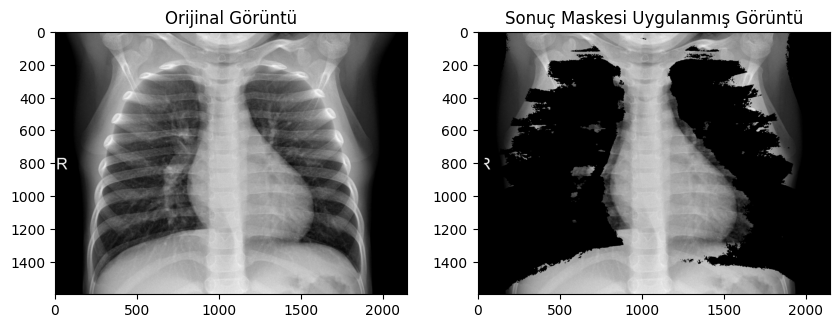

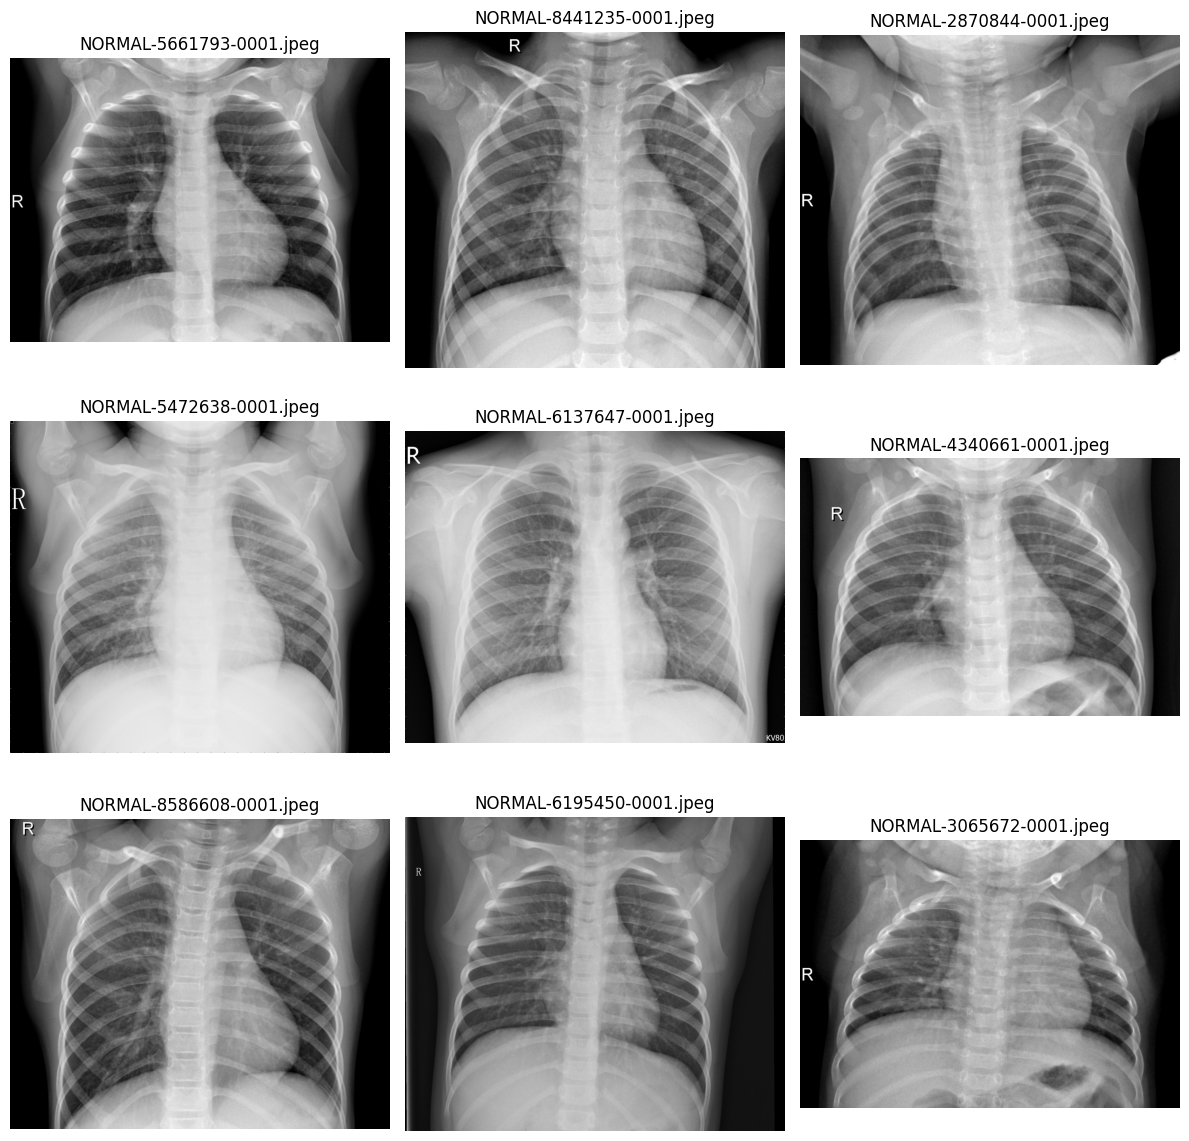

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from skimage import exposure
from skimage.measure import regionprops, label

# Google Drive'ı bağlama
drive.mount('/content/drive')

# Görüntülerin bulunduğu klasör yolu
data_path = '/content/drive/My Drive/chest_xray/test/NORMAL'  # Buraya görüntülerin olduğu klasör yolunu yazın

# JPEG dosyalarını listeleme
image_files = [f for f in os.listdir(data_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(f"{len(image_files)} resim bulundu.")

# Rastgele 9 görüntü seç
random_images = np.random.choice(image_files, 9, replace=False)

# Görüntüleri görselleştirme
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, img_name in enumerate(random_images):
    img_path = os.path.join(data_path, img_name)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    ax = axes[i // 3, i % 3]
    ax.imshow(image, cmap='gray')
    ax.set_title(img_name)
    ax.axis('off')
plt.tight_layout()
plt.show()

# Görüntü İşleme Fonksiyonları
def crop_image(image):
    """Görüntüyü kenarlarından kırpar."""
    h, w = image.shape
    return image[int(h * 0.1):int(h * 0.9), int(w * 0.1):int(w * 0.9)]

# Örnek bir görüntüyü seçip kırpma işlemi
image_sample = cv2.imread(os.path.join(data_path, random_images[0]), cv2.IMREAD_GRAYSCALE)
cropped_image = crop_image(image_sample)

# Orijinal ve kırpılmış görüntüleri görselleştirme
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_sample, cmap='gray')
ax[0].set_title("Orijinal Görüntü")
ax[1].imshow(cropped_image, cmap='gray')
ax[1].set_title("Kırpılmış Görüntü")
plt.show()

# Kontrast Germe ve Histogram Eşitleme
stretched = exposure.rescale_intensity(cropped_image, in_range=(50, 200))
equalized = cv2.equalizeHist(cropped_image)

# Görselleştirme
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cropped_image, cmap='gray')
ax[0].set_title("Orijinal")
ax[1].imshow(stretched, cmap='gray')
ax[1].set_title("Kontrast Gerilmiş")
ax[2].imshow(equalized, cmap='gray')
ax[2].set_title("Histogram Eşitlenmiş")
plt.show()

# Gürültü Azaltma
median_blurred = cv2.medianBlur(equalized, 5)
gaussian_blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

# Görselleştirme
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(equalized, cmap='gray')
ax[0].set_title("Orijinal (Histogram Eşitleme)")
ax[1].imshow(median_blurred, cmap='gray')
ax[1].set_title("Median Blur")
ax[2].imshow(gaussian_blurred, cmap='gray')
ax[2].set_title("Gaussian Blur")
plt.show()

# Thresholding
_, global_thresh = cv2.threshold(equalized, 127, 255, cv2.THRESH_BINARY)
_, otsu_thresh = cv2.threshold(equalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Görselleştirme
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(equalized, cmap='gray')
ax[0].set_title("Orijinal")
ax[1].imshow(global_thresh, cmap='gray')
ax[1].set_title("Global Thresholding")
ax[2].imshow(otsu_thresh, cmap='gray')
ax[2].set_title("Otsu Thresholding")
plt.show()

# Post-processing: Bağlantılı bileşenleri bulma
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(otsu_thresh, connectivity=8)
props = regionprops(labels)

print("Bölge Sayısı:", num_labels)
for i, region in enumerate(props):
    print(f"Region {i+1}: Area={region.area}, Centroid={region.centroid}, Eccentricity={region.eccentricity}")

# Maskeyi yeniden boyutlandırma (eğer boyutlar eşleşmiyorsa)
otsu_thresh_resized = cv2.resize(otsu_thresh, (image_sample.shape[1], image_sample.shape[0]))

# Maskeyi 8-bit formatına dönüştürme (eğer gerekliyse)
otsu_thresh_resized = otsu_thresh_resized.astype(np.uint8)

# Maske uygulanmış görüntü
masked_image = cv2.bitwise_and(image_sample, image_sample, mask=otsu_thresh_resized)

# Görselleştirme
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_sample, cmap='gray')
ax[0].set_title("Orijinal Görüntü")
ax[1].imshow(masked_image, cmap='gray')
ax[1].set_title("Sonuç Maskesi Uygulanmış Görüntü")
plt.show()

# Son olarak rastgele seçilen 9 resmi görselleştirme
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, img_name in enumerate(random_images):
    img_path = os.path.join(data_path, img_name)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    ax = axes[i // 3, i % 3]
    ax.imshow(image, cmap='gray')
    ax.set_title(img_name)
    ax.axis('off')
plt.tight_layout()
plt.show()


Yapay Sinir Ağları Final Ödevi 1. Deneme

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


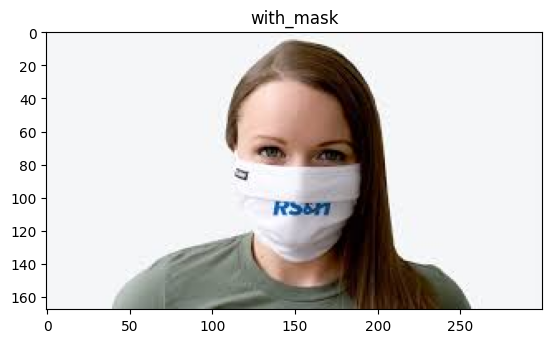

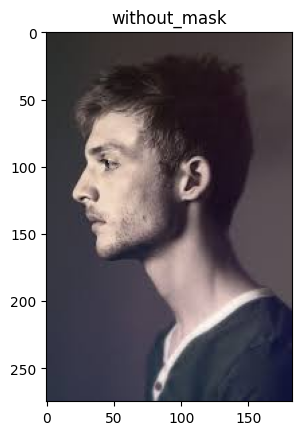

Found 5105 images belonging to 2 classes.
Found 1275 images belonging to 2 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 7,333,058 (27.97 MB)

 Trainable params: 7,249,410 (27.65 MB)

 Non-trainable params: 83,648 (326.75 KB)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 40/160 ━━━━━━━━━━━━━━━━━━━━ 53:32 27s/step - accuracy: 0.8612 - loss: 0.3330

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


160/160 ━━━━━━━━━━━━━━━━━━━━ 4505s 27s/step - accuracy: 0.9293 - loss: 0.1843 - val_accuracy: 0.8565 - val_loss: 0.6313 - learning_rate: 0.0010
Epoch 2/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 4393s 27s/step - accuracy: 0.9854 - loss: 0.0530 - val_accuracy: 0.9145 - val_loss: 0.2987 - learning_rate: 0.0010
Epoch 3/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 4374s 27s/step - accuracy: 0.9851 - loss: 0.0472 - val_accuracy: 0.9553 - val_loss: 0.1245 - learning_rate: 0.0010


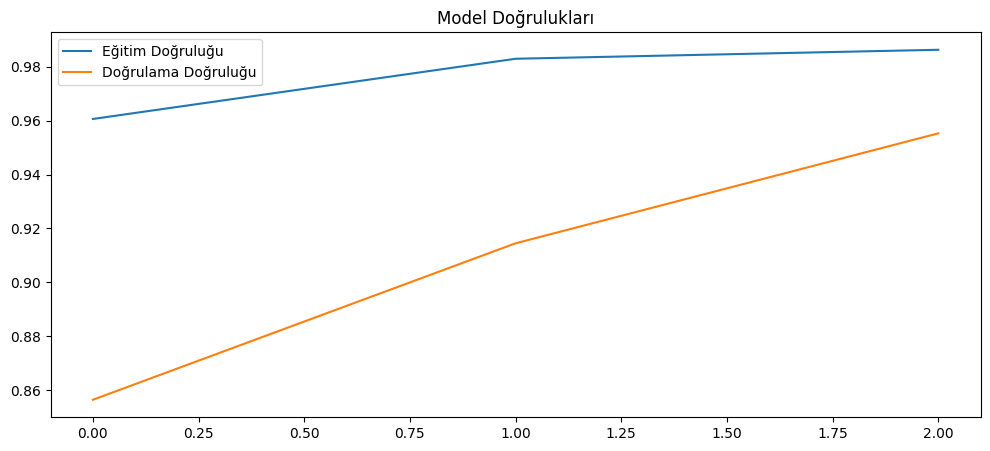

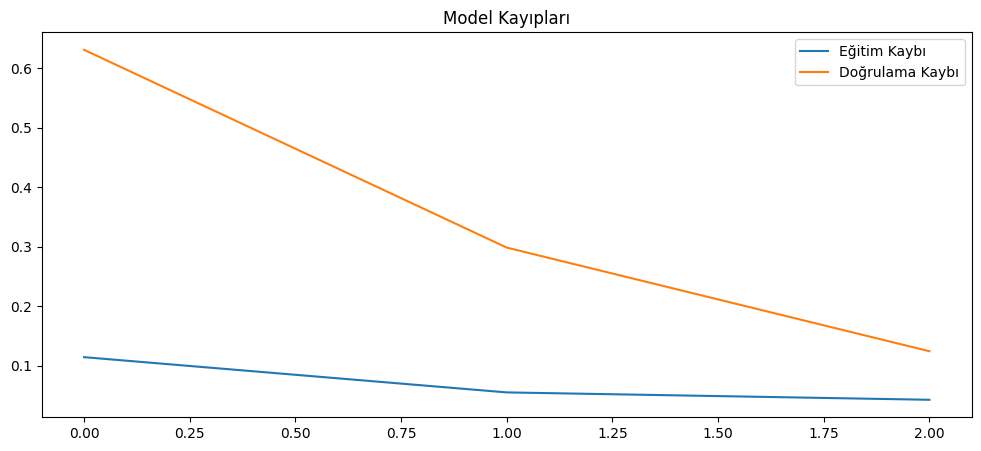

Found 6380 images belonging to 2 classes.
200/200 ━━━━━━━━━━━━━━━━━━━━ 1124s 6s/step
Confusion Matrix:
 [[2521   31]
 [  99 3729]]


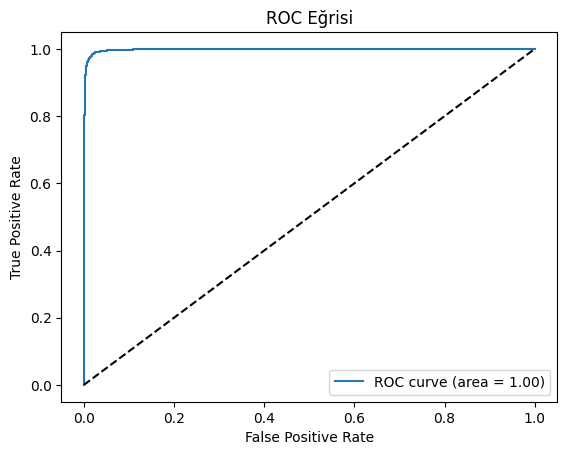

              precision    recall  f1-score   support

   with_mask       0.96      0.99      0.97      2552
without_mask       0.99      0.97      0.98      3828

    accuracy                           0.98      6380
   macro avg       0.98      0.98      0.98      6380
weighted avg       0.98      0.98      0.98      6380



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Google Drive'ı bağlama
drive.mount('/content/drive')

# Veri setinin bulunduğu yol
data_path = '/content/drive/My Drive/data'
categories = ['with_mask', 'without_mask']

# Görselleştirme (örnek fotoğraflar)
for category in categories:
    path = os.path.join(data_path, category)
    sample_image = plt.imread(os.path.join(path, os.listdir(path)[0]))
    plt.imshow(sample_image)
    plt.title(category)
    plt.show()

# Eğitim ve Test için veri hazırlama
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

image_size = (224, 224)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# DenseNet121 tabanlı modelin hazırlanması
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Modelin eğitilmesi
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=3,
    callbacks=[early_stopping, reduce_lr]
)

# Eğitim ve doğrulama sonuçlarının görselleştirilmesi
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend()
plt.title("Model Doğrulukları")
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.title("Model Kayıpları")
plt.show()

# Test verisini hazırlama ve model değerlendirme
test_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    data_path,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Performans metrikleri
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend()
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=categories))


Yapay sinir Ağları Final Ödevi 2. Deneme

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Veri seti eğitim, doğrulama ve test olarak ayrıldı!
Found 4081 images belonging to 2 classes.
Found 1022 images belonging to 2 classes.
Found 1277 images belonging to 2 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
126/128 ━━━━━━━━━━━━━━━━━━━━ 51s 26s/step - accuracy: 0.9199 - loss: 0.2140 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


128/128 ━━━━━━━━━━━━━━━━━━━━ 3551s 27s/step - accuracy: 0.9206 - loss: 0.2121 - val_accuracy: 0.7564 - val_loss: 4.0757 - learning_rate: 0.0010
Epoch 2/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 3374s 26s/step - accuracy: 0.9718 - loss: 0.0713 - val_accuracy: 0.9511 - val_loss: 0.1977 - learning_rate: 0.0010
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 3249s 25s/step - accuracy: 0.9720 - loss: 0.0818 - val_accuracy: 0.9883 - val_loss: 0.0321 - learning_rate: 0.0010
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 3262s 25s/step - accuracy: 0.9854 - loss: 0.0525 - val_accuracy: 0.6761 - val_loss: 1.1893 - learning_rate: 0.0010
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 3292s 26s/step - accuracy: 0.9837 - loss: 0.0565 - val_accuracy: 0.9051 - val_loss: 0.2006 - learning_rate: 0.0010
40/40 ━━━━━━━━━━━━━━━━━━━━ 217s 5s/step


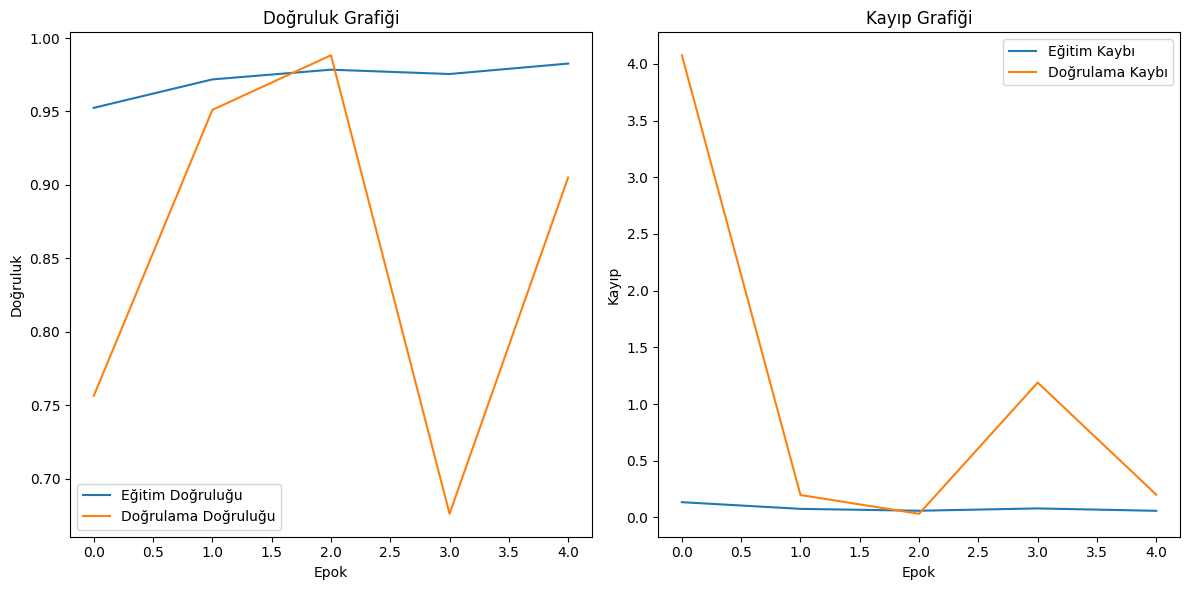

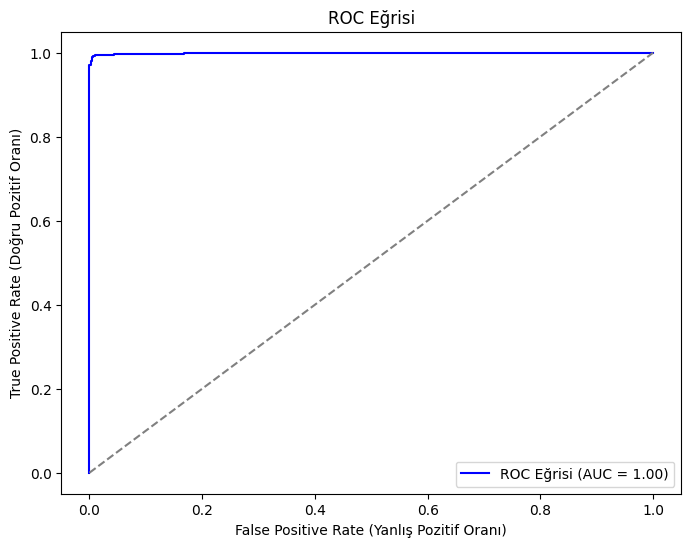

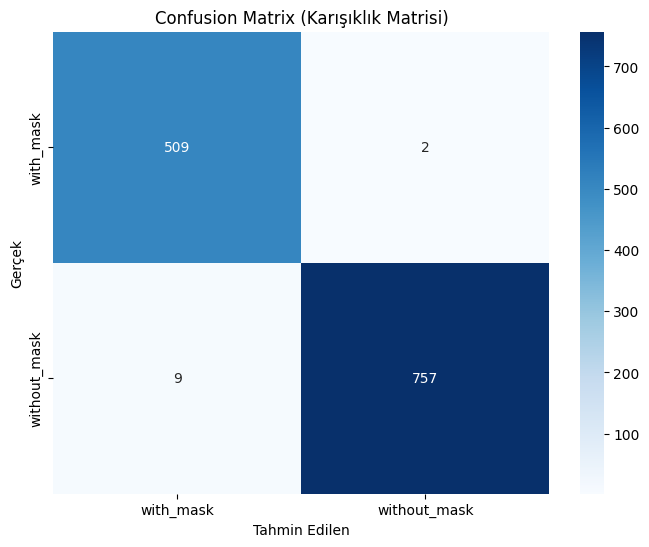

F1 Skoru: 0.99


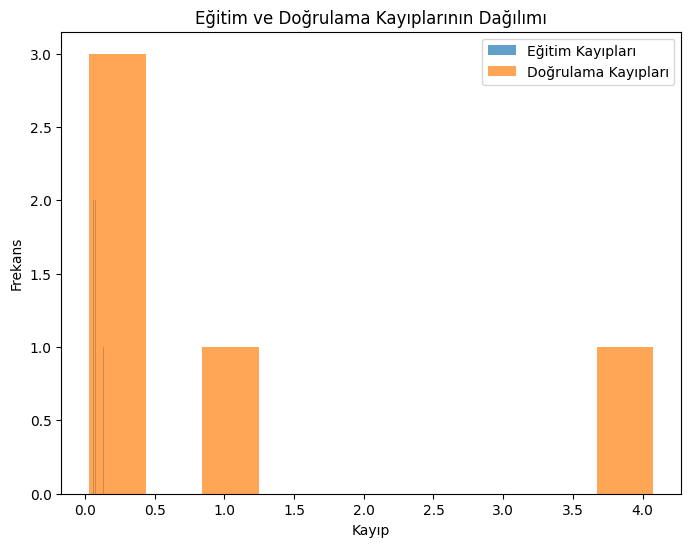

In [ ]:
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Google Drive'ı bağlama
drive.mount('/content/drive')

# Veri setinin bulunduğu yol
data_path = '/content/drive/My Drive/data'
output_path = '/content/drive/My Drive/split_data'
categories = ['with_mask', 'without_mask']

# 1. Veri Setini Bölme (Test setini ayırma)
if not os.path.exists(output_path):
    os.makedirs(output_path)

for category in categories:
    category_path = os.path.join(data_path, category)
    all_images = os.listdir(category_path)
    train_val_images, test_images = train_test_split(all_images, test_size=0.2, random_state=42)

    # Klasörleri oluşturma
    os.makedirs(os.path.join(output_path, 'train', category), exist_ok=True)
    os.makedirs(os.path.join(output_path, 'val', category), exist_ok=True)
    os.makedirs(os.path.join(output_path, 'test', category), exist_ok=True)

    # Eğitim ve validasyon ayrımı
    train_images, val_images = train_test_split(train_val_images, test_size=0.2, random_state=42)

    # Dosyaları taşıma
    for img in train_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(output_path, 'train', category, img))
    for img in val_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(output_path, 'val', category, img))
    for img in test_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(output_path, 'test', category, img))

print("Veri seti eğitim, doğrulama ve test olarak ayrıldı!")

# 2. Eğitim ve Doğrulama Generator'ları
image_size = (224, 224)

datagen_train = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen_val_test = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen_train.flow_from_directory(
    os.path.join(output_path, 'train'),
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen_val_test.flow_from_directory(
    os.path.join(output_path, 'val'),
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen_val_test.flow_from_directory(
    os.path.join(output_path, 'test'),
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 3. Modelin Hazırlanması
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Modelin Eğitilmesi
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[early_stopping, reduce_lr]
)

# Performans Analizi
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)

# 1. Doğruluk ve Kayıp Grafikleri
plt.figure(figsize=(12, 6))

# Eğitim ve doğrulama doğruluğu
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Grafiği')
plt.xlabel('Epok')
plt.ylabel('Doğruluk')
plt.legend()

# Eğitim ve doğrulama kaybı
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Grafiği')
plt.xlabel('Epok')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()

# 2. ROC Eğrisi ve AUC Skoru
fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Eğrisi (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Eğrisi')
plt.xlabel('False Positive Rate (Yanlış Pozitif Oranı)')
plt.ylabel('True Positive Rate (Doğru Pozitif Oranı)')
plt.legend(loc='lower right')
plt.show()

# 3. Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix (Karışıklık Matrisi)')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

# 4. F1 Skoru Hesaplama
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1 Skoru: {f1:.2f}")

# 5. Eğitim ve Doğrulama Kayıpları Üzerine Histogram
train_losses = history.history['loss']
val_losses = history.history['val_loss']

plt.figure(figsize=(8, 6))
plt.hist(train_losses, bins=10, alpha=0.7, label='Eğitim Kayıpları')
plt.hist(val_losses, bins=10, alpha=0.7, label='Doğrulama Kayıpları')
plt.title('Eğitim ve Doğrulama Kayıplarının Dağılımı')
plt.xlabel('Kayıp')
plt.ylabel('Frekans')
plt.legend()
plt.show()


Iterasyon | x1       | x2       | f(x1)    | f(x2)
--------------------------------------------------
    1     | 3.81966 | 6.18034 | 40.68110 | 13.20093
    2     | 6.18034 | 7.63932 | 13.20093 | 131.05211
    3     | 5.27864 | 6.18034 | 19.56302 | 13.20093
    4     | 6.18034 | 6.73762 | 13.20093 | 30.84258
    5     | 5.83592 | 6.18034 | 12.27452 | 13.20093


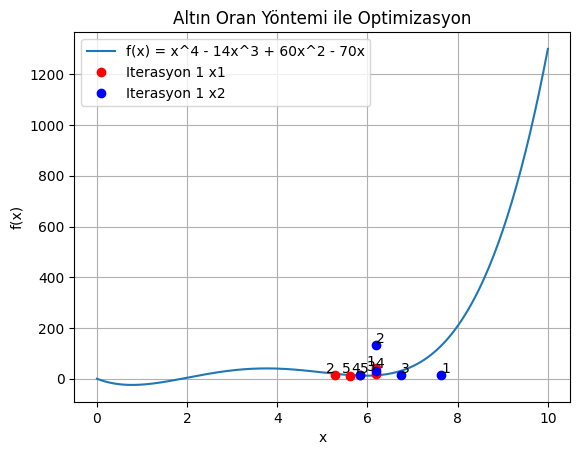

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def golden_search(f, a, b, tol=1e-5, max_iter=5):
    rho = (3 - np.sqrt(5)) / 2
    x1 = a + rho * (b - a)
    x2 = a + (1 - rho) * (b - a)
    iterations = []

    print("Iterasyon | x1       | x2       | f(x1)    | f(x2)")
    print("-" * 50)

    for i in range(max_iter):
        f_x1, f_x2 = f(x1), f(x2)
        print(f"{i+1:^9} | {x1:.5f} | {x2:.5f} | {f_x1:.5f} | {f_x2:.5f}")

        if f_x1 > f_x2:
            a = x1
            x1 = x2
            x2 = a + (1 - rho) * (b - a)
        else:
            b = x2
            x2 = x1
            x1 = a + rho * (b - a)

        iterations.append((x1, x2, f_x1, f_x2))

    return iterations

# Verilen fonksiyon
def f(x):
    return x**4 - 14*x**3 + 60*x**2 - 70*x

# Başlangıç aralığı
a, b = 0, 10

# Altın oran araması
iterations = golden_search(f, a, b)

# Görselleştirme
x_values = np.linspace(a, b, 400)
y_values = f(x_values)

plt.plot(x_values, y_values, label='f(x) = x^4 - 14x^3 + 60x^2 - 70x')
for i, (x1, x2, fx1, fx2) in enumerate(iterations):
    plt.plot(x1, fx1, 'ro', label=f'Iterasyon {i+1} x1' if i == 0 else "")
    plt.plot(x2, fx2, 'bo', label=f'Iterasyon {i+1} x2' if i == 0 else "")
    plt.text(x1, fx1, f"{i+1}", fontsize=10, verticalalignment='bottom', horizontalalignment='right')
    plt.text(x2, fx2, f"{i+1}", fontsize=10, verticalalignment='bottom', horizontalalignment='left')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Altın Oran Yöntemi ile Optimizasyon')
plt.legend()
plt.grid(True)
plt.show()


İterasyon 1: x1 = 6.15385, x2 = 3.84615, f(x1) = 12.91271, f(x2) = 40.63233
İterasyon 2: x1 = 2.40385, x2 = 1.44231, f(x1) = 17.36218, f(x2) = -13.82408
İterasyon 3: x1 = 3.26923, x2 = 2.98077, f(x1) = 37.48102, f(x2) = 32.61096
İterasyon 4: x1 = 3.65385, x2 = 3.46154, f(x1) = 40.57046, f(x2) = 39.52330
İterasyon 5: x1 = 3.75000, x2 = 3.75000, f(x1) = 40.72266, f(x2) = 40.72266


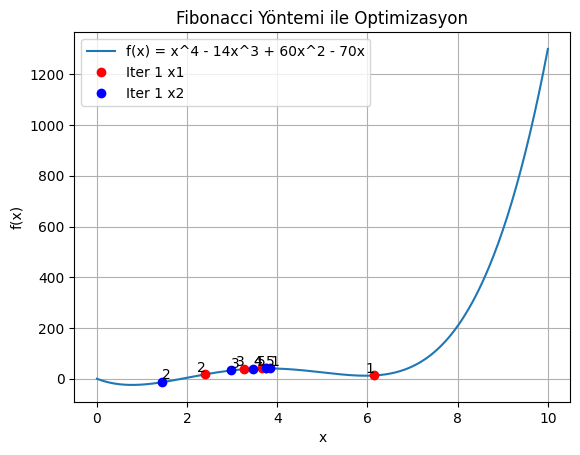


Yaklaşık Optimum Nokta: x* = 3.75000, f(x*) = 40.72266


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fibonacci sayılarını hesaplayan fonksiyon
def fibonacci(n):
    fib = [1, 1]
    for i in range(2, n+1):
        fib.append(fib[-1] + fib[-2])
    return fib

# Fibonacci Arama Yöntemi
def fibonacci_search(f, a, b, N=5):
    fib = fibonacci(N+1)
    iterations = []

    for n in range(N, 0, -1):
        rho_n = 1 - fib[n-1] / fib[n+1]
        x1 = a + rho_n * (b - a)
        x2 = a + (1 - rho_n) * (b - a)

        f_x1, f_x2 = f(x1), f(x2)
        iterations.append((x1, x2, f_x1, f_x2))

        print(f"İterasyon {N-n+1}: x1 = {x1:.5f}, x2 = {x2:.5f}, f(x1) = {f_x1:.5f}, f(x2) = {f_x2:.5f}")

        if f_x1 > f_x2:
            a = x1
        else:
            b = x2

    x_opt = (x1 + x2) / 2
    return iterations, x_opt

# Hedef fonksiyon
def f(x):
    return x**4 - 14*x**3 + 60*x**2 - 70*x

# Başlangıç aralığı
a, b = 0, 10

# Fibonacci araması
iterations, x_opt = fibonacci_search(f, a, b, N=5)

# Grafiği çizme
x_values = np.linspace(a, b, 400)
y_values = f(x_values)

plt.plot(x_values, y_values, label='f(x) = x^4 - 14x^3 + 60x^2 - 70x')
for i, (x1, x2, fx1, fx2) in enumerate(iterations):
    plt.plot(x1, fx1, 'ro', label=f'Iter {i+1} x1' if i == 0 else "")
    plt.plot(x2, fx2, 'bo', label=f'Iter {i+1} x2' if i == 0 else "")
    plt.text(x1, fx1, f"{i+1}", fontsize=10, verticalalignment='bottom', horizontalalignment='right')
    plt.text(x2, fx2, f"{i+1}", fontsize=10, verticalalignment='bottom', horizontalalignment='left')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fibonacci Yöntemi ile Optimizasyon')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nYaklaşık Optimum Nokta: x* = {x_opt:.5f}, f(x*) = {f(x_opt):.5f}")


<ipython-input-1-d4569416504f>:14: RuntimeWarning: overflow encountered in scalar power
  16*(x[2] + 5)**3  # x₃'e göre kısmi türev
<ipython-input-1-d4569416504f>:47: RuntimeWarning: invalid value encountered in subtract
  x_new = x - learning_rate * grad


Gradyan İniş Sonuçları:
Bulunan minimum nokta: [3.88869221 2.99999999        nan]
Fonksiyon değeri: nan
İterasyon sayısı: 1001

En Dik İniş Sonuçları:
Bulunan minimum nokta: [ 4.01119082  2.99999687 -5.00559653]
Fonksiyon değeri: 0.0000000196
İterasyon sayısı: 1001


<ipython-input-1-d4569416504f>:7: RuntimeWarning: overflow encountered in scalar power
  return (x[0] - 4)**4 + (x[1] - 3)**2 + 4*(x[2] + 5)**4


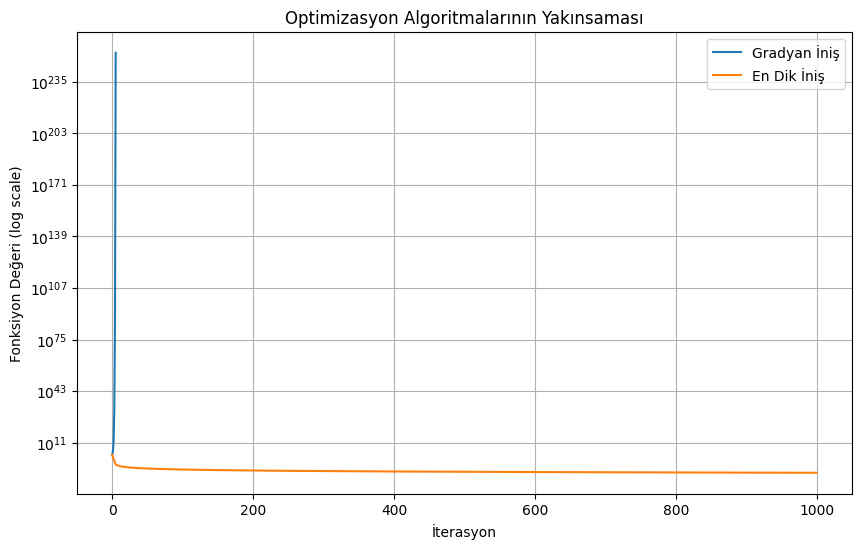

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Amaç fonksiyonu ve gradyanı
def f(x):
    """f(x₁, x₂, x₃) = (x₁ - 4)⁴ + (x₂ - 3)² + 4(x₃ + 5)⁴ fonksiyonu"""
    return (x[0] - 4)**4 + (x[1] - 3)**2 + 4*(x[2] + 5)**4

def gradient(x):
    """Fonksiyonun gradyan vektörü (türevleri)"""
    return np.array([
        4*(x[0] - 4)**3,  # x₁'e göre kısmi türev
        2*(x[1] - 3),     # x₂'ye göre kısmi türev
        16*(x[2] + 5)**3  # x₃'e göre kısmi türev
    ])

# Altın oran arama yöntemi (doğrusal arama için)
def golden_section_search(f, a, b, tol=1e-6, max_iter=100):
    """Altın oran yöntemiyle 1 boyutlu optimizasyon"""
    gr = (np.sqrt(5) + 1) / 2  # Altın oran (~1.618)

    c = b - (b - a) / gr
    d = a + (b - a) / gr

    for _ in range(max_iter):
        if f(c) < f(d):
            b = d
        else:
            a = c

        c = b - (b - a) / gr
        d = a + (b - a) / gr

        if abs(b - a) < tol:
            break

    return (a + b) / 2

# Gradyan iniş yöntemi
def gradient_descent(initial_point, learning_rate, max_iter=1000, tol=1e-6):
    """Sabit adım boyutlu gradyan iniş algoritması"""
    x = initial_point.copy()
    history = [x.copy()]

    for i in range(max_iter):
        grad = gradient(x)
        x_new = x - learning_rate * grad

        if np.linalg.norm(x_new - x) < tol:
            break

        x = x_new
        history.append(x.copy())

    return x, np.array(history)

# En dik iniş yöntemi
def steepest_descent(initial_point, max_iter=1000, tol=1e-6):
    """Optimal adım boyutlu en dik iniş algoritması"""
    x = initial_point.copy()
    history = [x.copy()]

    for i in range(max_iter):
        grad = gradient(x)

        # Doğrusal arama fonksiyonu
        def phi(alpha):
            return f(x - alpha * grad)

        # Optimal adım boyutunu bul
        alpha = golden_section_search(phi, 0, 1, tol=1e-6)

        x_new = x - alpha * grad

        if np.linalg.norm(x_new - x) < tol:
            break

        x = x_new
        history.append(x.copy())

    return x, np.array(history)

# Ana çalıştırma kısmı
if __name__ == "__main__":
    # Başlangıç noktası
    initial_point = np.array([0.0, 0.0, 0.0])

    # Gradyan iniş parametreleri
    learning_rate = 0.01

    # Algoritmaları çalıştır
    gd_result, gd_history = gradient_descent(initial_point, learning_rate)
    sd_result, sd_history = steepest_descent(initial_point)

    # Sonuçları yazdır
    print("Gradyan İniş Sonuçları:")
    print(f"Bulunan minimum nokta: {gd_result}")
    print(f"Fonksiyon değeri: {f(gd_result):.10f}")
    print(f"İterasyon sayısı: {len(gd_history)}")

    print("\nEn Dik İniş Sonuçları:")
    print(f"Bulunan minimum nokta: {sd_result}")
    print(f"Fonksiyon değeri: {f(sd_result):.10f}")
    print(f"İterasyon sayısı: {len(sd_history)}")

    # Yakınsama grafiği
    plt.figure(figsize=(10, 6))
    plt.semilogy([f(x) for x in gd_history], label='Gradyan İniş')
    plt.semilogy([f(x) for x in sd_history], label='En Dik İniş')
    plt.xlabel('İterasyon')
    plt.ylabel('Fonksiyon Değeri (log scale)')
    plt.title('Optimizasyon Algoritmalarının Yakınsaması')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
import pandas as pd
df=pd.read_csv("Student_Marks.csv")
df.head(3)

number_courses  time_study   Marks
0               3       4.508  19.202
1               4       0.096   7.734
2               4       3.133  13.811

In [ ]:
y=df[["Marks"]]
x=df[["number_courses","time_study"]]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
l=LinearRegression()
model=l.fit(x,y)

In [ ]:
model.predict([[4,4]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[21.59657189]])

In [ ]:
df["Marks"].max()


55.299

In [ ]:
model.score(x,y)

0.9403656320238896

In [ ]:
model.coef_

array([[1.86405074, 5.39917879]])

In [ ]:
model.intercept_

array([-7.45634623])

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Audi.csv')
df.head(3)

index    Year       Type  Mileage(miles)  ... MileageRank  PriceRank PPYRank Score
0      0  2018.0  Hatchback         44000.0  ...         215        163     340   718
1      4  2016.0  Hatchback         42596.0  ...         222        330     276   828
2      7  2015.0  Hatchback         42700.0  ...         221        327      94   642

[3 rows x 16 columns]

In [ ]:
df=df.drop(columns=['index','href','MileageRank','PriceRank','PPYRank','Score'])

KeyError: "['index', 'href', 'MileageRank', 'PriceRank', 'PPYRank', 'Score'] not found in axis"

In [ ]:
df.head(3)

Year       Type  Mileage(miles) Engine  ...    Fuel Number_of_Owners Price(£)          PPY
0  2018.0  Hatchback         44000.0   1.6L  ...  Diesel                1  14995.0  2499.166667
1  2016.0  Hatchback         42596.0   1.0L  ...  Petrol                3  10755.0  2688.750000
2  2015.0  Hatchback         42700.0   1.4L  ...  Petrol                2  10799.0  3599.666667

[3 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    float64
 1   Type              471 non-null    object 
 2   Mileage(miles)    471 non-null    float64
 3   Engine            471 non-null    object 
 4   PS                471 non-null    float64
 5   Transmission      471 non-null    object 
 6   Fuel              471 non-null    object 
 7   Number_of_Owners  471 non-null    int64  
 8   Price(£)          471 non-null    float64
 9   PPY               471 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 36.9+ KB


In [ ]:
df.head(3)

Year       Type  Mileage(miles) Engine  ...    Fuel Number_of_Owners Price(£)          PPY
0  2018.0  Hatchback         44000.0   1.6L  ...  Diesel                1  14995.0  2499.166667
1  2016.0  Hatchback         42596.0   1.0L  ...  Petrol                3  10755.0  2688.750000
2  2015.0  Hatchback         42700.0   1.4L  ...  Petrol                2  10799.0  3599.666667

[3 rows x 10 columns]

In [ ]:
df.columns=["Yil","Kasa","Mil","Motor","Ps","Vites","Yakit","Sahip","Fiyat","PPY"]

In [ ]:
df.head(3)

Yil       Kasa      Mil Motor          Ps   Vites   Yakit  Sahip    Fiyat          PPY
0  2018.0  Hatchback  44000.0  1.6L  114.398422  Manual  Diesel      1  14995.0  2499.166667
1  2016.0  Hatchback  42596.0  1.0L   93.688363  Manual  Petrol      3  10755.0  2688.750000
2  2015.0  Hatchback  42700.0  1.4L  123.274162  Manual  Petrol      2  10799.0  3599.666667

In [ ]:
df['Motor']=df['Motor'].str.replace("L","")

In [ ]:
df['Motor']=pd.to_numeric(df['Motor'])

Yil       Kasa      Mil  Motor          Ps   Vites   Yakit  Sahip    Fiyat          PPY
0  2018.0  Hatchback  44000.0    1.6  114.398422  Manual  Diesel      1  14995.0  2499.166667
1  2016.0  Hatchback  42596.0    1.0   93.688363  Manual  Petrol      3  10755.0  2688.750000
2  2015.0  Hatchback  42700.0    1.4  123.274162  Manual  Petrol      2  10799.0  3599.666667

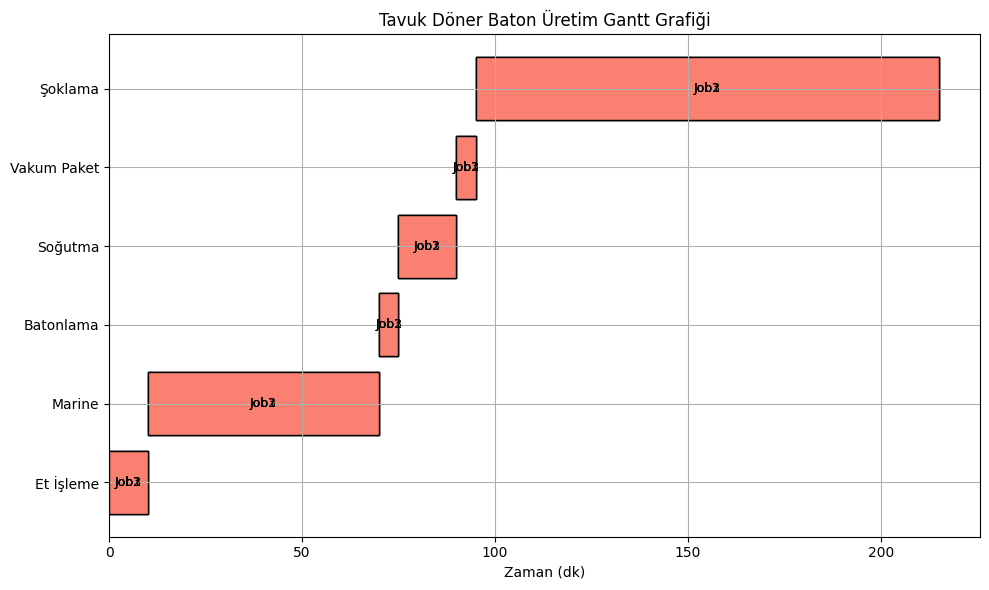

In [ ]:
import matplotlib.pyplot as plt

# İş tanımları (süreler dakika cinsindendir)
jobs = {
    'Job1': [10, 60, 5, 15, 5, 120],
    'Job2': [10, 60, 5, 15, 5, 120],
    'Job3': [10, 60, 5, 15, 5, 120]
}

machines = ['Et İşleme', 'Marine', 'Batonlama', 'Soğutma', 'Vakum Paket', 'Şoklama']

# İş zamanlarını tutacak yapı
schedule = {m: [] for m in machines}

# İş başlama zamanlarını tutan yapı
job_start_times = {job: 0 for job in jobs}

# Her iş sıralı olarak makinelerde çalışır
for job_name, durations in jobs.items():
    start_time = 0
    for i, duration in enumerate(durations):
        machine = machines[i]
        # Makinenin en son ne zaman boş olduğu
        machine_available_time = schedule[machine][-1][1] if schedule[machine] else 0
        actual_start = max(start_time, machine_available_time)
        end_time = actual_start + duration
        schedule[machine].append((job_name, actual_start, end_time))
        start_time = end_time

# 🎨 Gantt grafiğini çiz
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['skyblue', 'lightgreen', 'salmon']
job_colors = dict(zip(jobs.keys(), colors))

yticks = []
yticklabels = []

for i, (machine, tasks) in enumerate(schedule.items()):
    for task in tasks:
        job_name, start, end = task
        ax.barh(i, end - start, left=start, color=job_colors[job_name], edgecolor='black')
        ax.text(start + (end - start)/2, i, job_name, va='center', ha='center', fontsize=9, color='black')
    yticks.append(i)
    yticklabels.append(machine)

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_xlabel("Zaman (dk)")
ax.set_title("Tavuk Döner Baton Üretim Gantt Grafiği")
ax.grid(True)
plt.tight_layout()
plt.show()


# Yeni Bölüm

In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.linear_model import LinearRegression , Ridge


In [ ]:
df=pd.read_csv('Student_Marks.csv')

In [ ]:
df.head(3)

number_courses  time_study   Marks
0               3       4.508  19.202
1               4       0.096   7.734
2               4       3.133  13.811

In [ ]:
Y=df[["Marks"]]
X=df[["time_study"]]

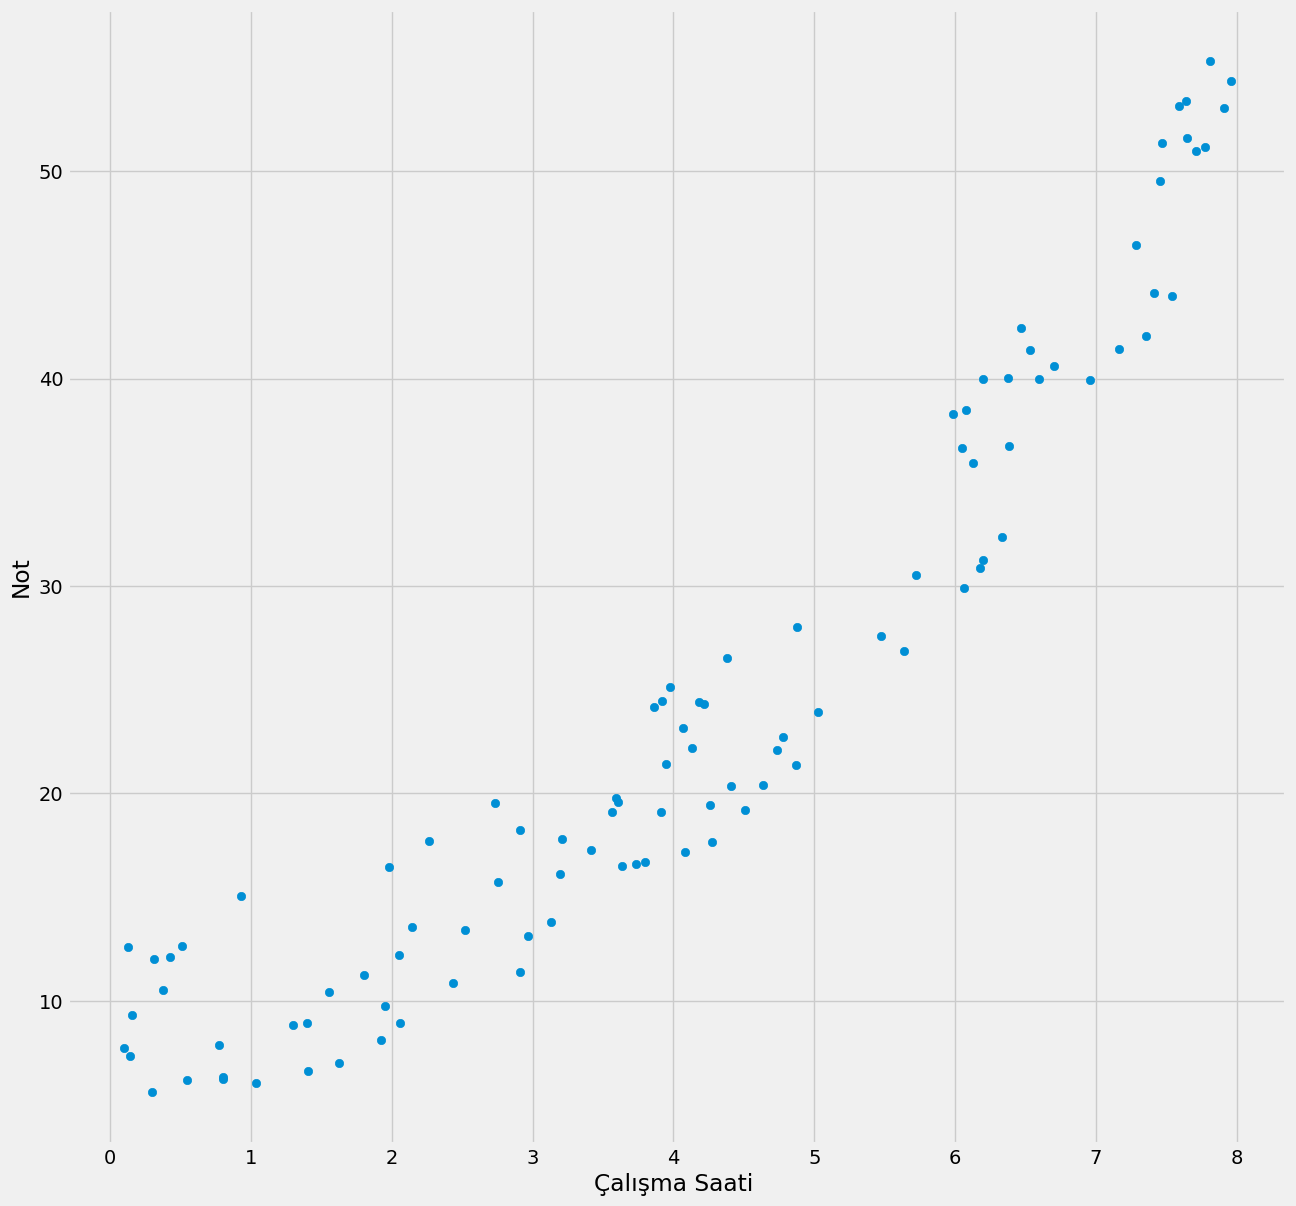

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,14))
plt.scatter(X,Y)
plt.xlabel("Çalışma Saati ")
plt.ylabel("Not")
plt.show()

In [ ]:
lr=LinearRegression()
model=lr.fit(X,Y)
model.score(X,Y)

0.8878423939061949

In [ ]:
alfalar=[1,10,100,100]
for a in alfalar:
    r=Ridge(alpha=a)
    modelr=r.fit(X,Y)
    skor=modelr.score(X,Y)
    print(modelr.score(X,Y))
    print("Katsayı",modelr.coef_)





0.8878395469511184
Katsayı [5.67856359]
0.8875666577020126
Katsayı [5.58849778]
0.8673013865239424
Katsayı [4.82346415]
0.8673013865239424
Katsayı [4.82346415]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

In [ ]:
df=pd.read_csv("Card.csv")

In [ ]:
df.head(3)

ID  LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month
0   1    20000.0    2          2  ...       0.0       0.0       0.0                           1
1   2   120000.0    2          2  ...    1000.0       0.0    2000.0                           1
2   3    90000.0    2          2  ...    1000.0    1000.0    5000.0                           0

[3 rows x 25 columns]

In [ ]:
df=df.drop("ID",axis=1)

In [ ]:
y=df["default.payment.next.month"]
x=df.drop("default.payment.next.month",axis=1)

In [ ]:
df.shape

(30000, 24)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.77,random_state=6)

In [ ]:
log=LogisticRegression()
model=log.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.score(x_test,y_test)

0.7739130434782608

In [ ]:
Deneme=np.array(x.iloc[1903])

In [ ]:
model.predict([Deneme])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
y.iloc[1903]

np.int64(0)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import graphviz

In [ ]:
df=pd.read_csv("Heart.csv")
df.head(3)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1   37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2   41    0   1       130   204    0        0      172      0      1.4      2   0     2       1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
y=df['target']
x=df.drop("target",axis=1)


In [ ]:
tree=DecisionTreeClassifier()
model=tree.fit(x,y)

In [ ]:
model.score(x,y)

1.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

In [ ]:
tree=DecisionTreeClassifier()
model=tree.fit(x_train,y_train)
model.score(x_test,y_test)

0.7912087912087912

In [ ]:
x

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233    1        0      150      0      2.3      0   0     1
1     37    1   2       130   250    0        1      187      0      3.5      0   0     2
2     41    0   1       130   204    0        0      172      0      1.4      2   0     2
3     56    1   1       120   236    0        1      178      0      0.8      2   0     2
4     57    0   0       120   354    0        1      163      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...    ...  ..   ...
298   57    0   0       140   241    0        1      123      1      0.2      1   0     3
299   45    1   3       110   264    0        1      132      0      1.2      1   0     3
300   68    1   0       144   193    1        1      141      0      3.4      1   2     3
301   57    1   0       130   131    0        1      115      1      1.2      1   1     3
302   57    0   1       130   236    0        0      174      0      0.0      1   1     2

[303 rows x 13 columns]

In [ ]:
model.predict([[47,1,2,130,240,0,0,150,0,0,2,0,3]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

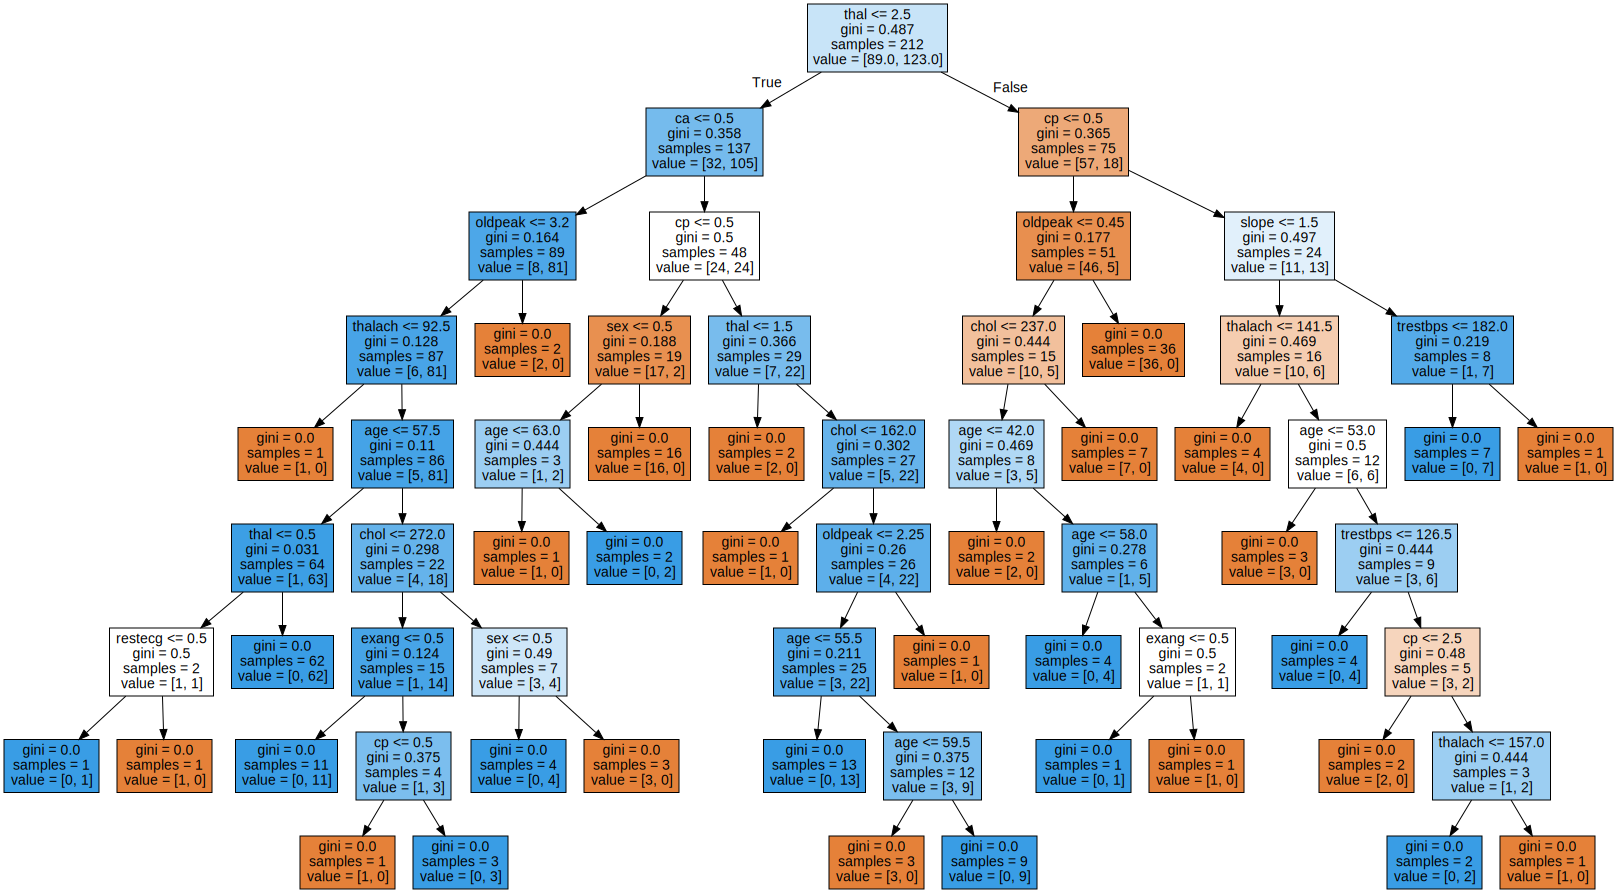

In [ ]:
dot=export_graphviz(model,feature_names=x.columns,filled=True)
gorsel=graphviz.Source(dot)
gorsel

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
forest=RandomForestClassifier()
model=forest.fit(x,y)
model.score(x,y)

1.0

In [ ]:
forest=RandomForestClassifier(n_estimators=50,max_depth=3)
model=forest.fit(x_train,y_train)
model.score(x_test,y_test)

0.8571428571428571

In [ ]:
import pandas as pd               # Veri analizi için
import numpy as np                # Sayısal işlemler için
from sklearn.tree import DecisionTreeClassifier         # Karar ağacı sınıflandırıcısı
from sklearn.ensemble import RandomForestClassifier      # Rastgele orman sınıflandırıcısı
import xgboost as xgb             # XGBoost algoritması (gradient boosting)
from sklearn.model_selection import train_test_split    # Eğitim/test verisi ayırma

In [ ]:
df= pd.read_csv("Heart.csv")

In [ ]:
df.head(3)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1

In [ ]:
y= df["target"]
x= df.drop("target",axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)


In [ ]:
dt=DecisionTreeClassifier()
model=dt.fit(x,y)

In [ ]:
model.score(x,y)

1.0

In [ ]:
dt=DecisionTreeClassifier()
model=dt.fit(x_train,y_train)
model.score(x_test,y_test)


0.7252747252747253

In [ ]:
rf=RandomForestClassifier(n_estimators=200)
model=rf.fit(x_train,y_train)
model.score(x_test,y_test)

0.8021978021978022

In [ ]:
rf=xgb.XGBClassifier()
model=rf.fit(x_train,y_train)
model.score(x_test,y_test)

0.8131868131868132

In [ ]:
df.shape

(303, 14)

dt=DecisionTreeClassifier()
model=dt.fit(x,y)
model(x,y)

In [ ]:
insan=df.sample().drop("target",axis=1).values

In [ ]:
model.predict(insan)

array([0])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv('insurance.csv')

In [ ]:
df=pd.get_dummies(df,columns=["sex","smoker","region"],drop_first=True)

In [ ]:
y=df['charges']
x=df.drop(columns=["charges"])

In [ ]:
df= x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [ ]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
model.score(x_test,y_test)

0.7696118054369011

In [ ]:
rf=RandomForestRegressor(n_estimators=200)
model=rf.fit(x_train,y_train)
model.score(x_test,y_test)

0.8549445259928975

In [ ]:
x.head(3)

age    bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.90         0  ...             False             False              True
1   18  33.77         1  ...             False              True             False
2   28  33.00         3  ...             False              True             False

[3 rows x 8 columns]

In [ ]:
model.predict([[30,32,1,1,0,1,0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5601.9661923])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df=pd.read_csv('PlanePrice.csv')

In [ ]:
df.head(3)

Model Name Engine Type  ... Range N.M.      Price
0  100 Darter (S.L. Industries)      Piston  ...        370  1300000.0
1                   7 CCM Champ      Piston  ...        190  1230000.0
2  100 Darter (S.L. Industries)      Piston  ...        210  1600000.0

[3 rows x 16 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

In [ ]:
df=df[["Rcmnd cruise Knots","Stall Knots dirty","Fuel gal/lbs","Eng out rate of climb","Price"]]

In [ ]:
df.head()
df=df.dropna()

In [ ]:
y=df["Price"]
x=df.drop("Price",axis=1)

In [ ]:
#Y için normalizasyon yapılmaz
#outlier etkisi azalır
#model performansı artar

In [ ]:
ss=StandardScaler()
x2=ss.fit_transform(x)

In [ ]:
np.mean(x2)

np.float64(3.475480772739621e-17)

In [ ]:
x2=pd.DataFrame(x2)
x2.head(3)

0         1         2         3
0 -1.068341 -0.904960 -0.301214 -1.011179
1 -1.148585 -1.027513 -0.306625 -1.177365
2 -1.198738 -1.456449 -0.305594 -1.403563

In [ ]:
x2[0].mean()

np.float64(4.633974363652827e-17)

In [ ]:
mm=MinMaxScaler()
x3=mm.fit_transform(x)

In [ ]:
x3=pd.DataFrame(x3)

In [ ]:
x3.head(3)

0         1         2         3
0  0.051724  0.215909  0.000814  0.074541
1  0.032020  0.193182  0.000102  0.044254
2  0.019704  0.113636  0.000237  0.003029

In [ ]:
x3.mean()

0    0.314061
1    0.383733
2    0.040458
3    0.258831
dtype: float64

In [ ]:
# 🔧 1. Gerekli kütüphaneleri yükle
!pip install ultralytics opencv-python --quiet

# 📁 2. Kullanıcıdan model (.pt) ve video (.mp4) dosyasını yüklemesini iste
from google.colab import files

print("Lütfen YOLOv8 model dosyasını (.pt) yükleyin:")
model_file = files.upload()

print("Lütfen analiz etmek istediğiniz video dosyasını (.mp4) yükleyin:")
video_file = files.upload()

# 📌 3. Dosya adlarını al
model_path = list(model_file.keys())[0]
video_path = list(video_file.keys())[0]

# 🧠 4. Modeli yükle
from ultralytics import YOLO
import cv2
import numpy as np

model = YOLO(model_path)

# 🎞️ 5. Videoyu aç
cap = cv2.VideoCapture(video_path)
frame_id = 0

print("\n🚀 Video işleniyor, plakalar tespit ediliyor...\n")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_id += 1

    # 🧠 6. Plaka tespiti yap
    results = model(frame)[0]  # YOLOv8 sonucu

    # 🔍 7. Tespit edilen her kutucuk için
    for i, box in enumerate(results.boxes.xyxy):
        x1, y1, x2, y2 = map(int, box)
        plate_crop = frame[y1:y2, x1:x2]

        # 📏 8. Bulanıklık ölçümü (Laplacian yöntemi)
        gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
        lap_var = cv2.Laplacian(gray, cv2.CV_64F).var()
        is_blur = lap_var < 100  # eşik değeri (isteğe göre ayarlanabilir)

        durum = "BULANIK" if is_blur else "NET"
        print(f"🎬 Kare {frame_id} - Plaka {i+1}: {durum} (Skor: {lap_var:.2f})")

cap.release()
print("\n✅ Analiz tamamlandı.")


Lütfen YOLOv8 model dosyasını (.pt) yükleyin:


Saving best.pt to best (1).pt
Lütfen analiz etmek istediğiniz video dosyasını (.mp4) yükleyin:


Saving WhatsApp Video 2025-04-12 at 2.32.00 PM.mp4 to WhatsApp Video 2025-04-12 at 2.32.00 PM (4).mp4
WARNING ⚠️ best (1).pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolo11n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 40.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.7s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


🚀 Video işleniyor, plakalar tespit ediliyor...


0: 640x576 (no detections), 443.0ms
Speed: 35.6ms preprocess, 443.0ms inference, 13.5ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 (no detections), 246.0ms
Speed: 5.2ms

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv('bankv3.csv')

In [ ]:
df.head(3)

Unnamed: 0                      sorgu      label  le
0           0    kredi kartımı kaybettim  kartkayip   1
1           1    banka kartımı kaybettim  kartkayip   1
2           2  kredi kartımı bulamıyorum  kartkayip   1

In [ ]:
df=df[['sorgu','label']]

In [ ]:
df.head(3)

sorgu      label
0    kredi kartımı kaybettim  kartkayip
1    banka kartımı kaybettim  kartkayip
2  kredi kartımı bulamıyorum  kartkayip

In [ ]:
turkish_stop_words = [
    'acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü',
    'da', 'daha', 'de', 'defa', 'diye', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise',
    'kez', 'ki', 'kim', 'mı', 'mi', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin',
    'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani'
]

mesaj=input("Yapmak istediğiniz işlemi giriniz")
mesajdf=pd.DataFrame({"sorgu":mesaj, "label":0 },index=[42])
df=pd.concat([df,mesajdf],ignore_index=True)

for word in turkish_stop_words:
    word=" "+word+""
    df['sorgu']=df['sorgu'].str.replace(word," ")


Yapmak istediğiniz işlemi girinizEft ile takipcilerime Para göndermek istiyorum


In [ ]:
df.head(3)

sorgu      label
0  kredi kartımı kaybettim  kartkayip
1  banka kartımı kaybettim  kartkayip
2  kredi kartımı lamıyorum  kartkayip

In [ ]:

cv=CountVectorizer(max_features=50)
#tahmin=x[-1].copy # The problem is here. You are assigning the method `copy` itself.
x=cv.fit_transform(df['sorgu']).toarray()[0:-1]
tahmin = x[-1].copy() # Call the copy method to get a copy of the last row
y=df['label'][0:-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=21)

In [ ]:
rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
skor=model.score(x_test,y_test)
sonuc=model.predict([tahmin])
print(" Sonuç: ", sonuc,"Skor :",skor)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df=pd.read_csv('bankv3.csv')
df=df[['sorgu','label']]

turkish_stop_words = [
    'acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü',
    'da', 'daha', 'de', 'defa', 'diye', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise',
    'kez', 'ki', 'kim', 'mı', 'mi', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin',
    'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani'
]

mesaj=input("Yapmak istediğiniz işlemi giriniz")
mesajdf=pd.DataFrame({"sorgu":mesaj, "label":0 },index=[42])
df=pd.concat([df,mesajdf],ignore_index=True)

for word in turkish_stop_words:
    word=" "+word+""
    df['sorgu']=df['sorgu'].str.replace(word," ")

# Instead of converting the entire column, only convert where it's not "kartkayip"
# Assuming 'kartkayip' should be represented as a numerical value (e.g., 0, 1, 2...)
# df['label'] = pd.to_numeric(df['label'], errors='coerce').fillna(0).astype(int)

# Explanation:
# 1. errors='coerce': Converts invalid parsing (like "kartkayip") to NaN.
# 2. fillna(0): Replaces NaN values with 0 (or another suitable numerical value).
# 3. astype(int): Ensures the column is of integer type.

cv=CountVectorizer(max_features=50)
x=cv.fit_transform(df['sorgu']).toarray()
tahmin = x[-1].copy()
x=x[0:-1]
y=y[0:-1]
y=df['label'][0:-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=21)

rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
skor=model.score(x_test,y_test)
sonuc=model.predict([tahmin])
print(" Sonuç: ", sonuc,"Skor :",skor)

Yapmak istediğiniz işlemi girinizKredi kartını borcunu ödemesi için fast ile ödeme yapacağım amam kredi kartını kaybettim.
 Sonuç:  ['borcodeme'] Skor : 0.9622641509433962


In [ ]:
tahmin

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
import pandas as pd
import numpy as np
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head(3)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1

In [ ]:
df=df.drop(columns=["RowNumber","CustomerId","Surname"])

In [ ]:
df.head(3)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1

In [ ]:
pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1              False   
1                  1        112542.58       0              False   
2                  0        113931.57       1              False   
3                  0         93826.63       0              False   
4                  1         79084.10       0              False   
...              ...              ...     ...                ...   
9995               0         96270.64       0              False   
9996               1        101699.77       0              False   
9997               1         42085.58       1              False   
9998               0         92888.52       1               True   
9999               0         38190.78       0              False   

      Geography_Spain  Gender_Male  
0               False        False  
1                True        False  
2               False        False  
3               False        False  
4                True        False  
...               ...          ...  
9995            False         True  
9996            False         True  
9997            False        False  
9998            False         True  
9999            False        False  

[10000 rows x 12 columns]

In [ ]:
# Applying the pd.get_dummies changes to your dataframe
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)
y=df['Exited']
x=df.drop("Exited",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=61)
rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
model.score(x_test,y_test)

0.861

In [ ]:
x.head(2)

CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.00              1          1   
1          608   41       1  83807.86              1          0   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0               1        101348.88              False            False   
1               1        112542.58              False             True   

   Gender_Male  
0        False  
1        False

In [ ]:
model.predict([[600,21,40,3,60000,2,1,1,0,0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
df=pd.DataFrame()

In [ ]:
!pip install nltk pandas
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re

# NLTK veri setlerini indir (ilk kez çalıştırırken gerekli)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Veri setini oku
# Specify the encoding as 'latin1' or 'ISO-8859-1'
# 1. Veri setini oku
# Specify the encoding as 'latin1' or 'ISO-8859-1' and handle errors
# The error was due to unescaped quotation marks within the CSV file.
# Using the 'error_bad_lines=False' argument in pd.read_csv will skip these problematic lines.
df = pd.read_csv("training.csv", encoding='latin1', on_bad_lines='skip', engine="python", quoting=3)


# **Check the actual column names in your DataFrame:**
print(df.columns)

# **Replace 'Tweet' with the correct column name:**
text_column_name = 'Tweet' # Replace 'Tweet' with the actual column name from the output above


# 2. Temizleme fonksiyonu
def temizle(text):
    text = re.sub(r"http\S+|@\S+|#\S+|[^a-zA-ZğüşöçıİĞÜŞÖÇ\s]", "", text)
    text = text.lower()
    return text

# Apply temizle function to the correct column
df['clean_text'] = df[text_column_name].apply(temizle)

# 3. Tokenize et
df['tokens'] = df['clean_text'].apply(word_tokenize)

# 4. Stopwords çıkar
stop_words = set(stopwords.words('turkish'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# 5. Lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# 6. Tokenizer ile sayısal verilere çevir
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['tokens'].apply(lambda x: ' '.join(x)))
sequences = tokenizer.texts_to_sequences(df['tokens'].apply(lambda x: ' '.join(x)))
X = pad_sequences(sequences, maxlen=100)

# 7. Etiket sütunu (örnek: 0=negatif, 1=pozitif, 2=nötr)
# Eğer etiketler yazıysa önce sayıya çevirmelisin
# Örn: {'negative': 0, 'neutral': 1, 'positive': 2}
etiket_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['label'].map(etiket_map)

y = df['label']

# 8. Dengesiz verileri dengele
ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X, y)

# 9. Eğitim ve test veri seti
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# 10. LSTM Modeli
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # 3 sınıf için

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 11. Modeli eğit
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# 12. Test ve değerlendirme
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print("📊 Doğruluk:", accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['"0"', '"1467810369"', '"Mon Apr 06 22:19:45 PDT 2009"', '"NO_QUERY"',
       '"_TheSpecialOne_"', '"@switchfoot http://twitpic.com/2y1zl - Awww',
       ' that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"'],
      dtype='object')


KeyError: 'Tweet'